
## Pump it Up: Data Mining the Water Table

## Notebook

In [181]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import datetime as dt
import warnings
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Settings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")
%matplotlib inline

# Display options
pd.options.display.max_columns = 50
pd.options.display.max_rows = 10

In [184]:
test_data = pd.read_csv('/content/sample_data/test_set_values.csv')
train_data = pd.read_csv('/content/sample_data/training_set_values.csv')
train_labels = pd.read_csv('/content/sample_data/training_set_labels.csv')

In [186]:
# a look at data
test_data.head()

id  amount_tsh date_recorded                  funder  gps_height  \
0  50785         0.0    2013-02-04                    Dmdd        1996   
1  51630         0.0    2013-02-04  Government Of Tanzania        1569   
2  17168         0.0    2013-02-01                     NaN        1567   
3  45559         0.0    2013-01-22              Finn Water         267   
4  49871       500.0    2013-03-27                  Bruder        1260   

    installer  longitude   latitude                 wpt_name  num_private  \
0        DMDD  35.290799  -4.059696  Dinamu Secondary School            0   
1         DWE  36.656709  -3.309214                  Kimnyak            0   
2         NaN  34.767863  -5.004344           Puma Secondary            0   
3  FINN WATER  38.058046  -9.418672           Kwa Mzee Pange            0   
4      BRUDER  35.006123 -10.950412          Kwa Mzee Turuka            0   

                     basin  subvillage   region  region_code  district_code  \
0                 Internal      Magoma  Manyara           21              3   
1                  Pangani     Kimnyak   Arusha            2              2   
2                 Internal       Msatu  Singida           13              2   
3  Ruvuma / Southern Coast  Kipindimbi    Lindi           80             43   
4  Ruvuma / Southern Coast     Losonga   Ruvuma           10              3   

             lga          ward  population public_meeting  \
0          Mbulu        Bashay         321           True   
1   Arusha Rural      Kimnyaki         300           True   
2  Singida Rural          Puma         500           True   
3         Liwale       Mkutano         250            NaN   
4         Mbinga  Mbinga Urban          60            NaN   

               recorded_by scheme_management     scheme_name permit  \
0  GeoData Consultants Ltd        Parastatal             NaN   True   
1  GeoData Consultants Ltd               VWC  TPRI pipe line   True   
2  GeoData Consultants Ltd               VWC               P    NaN   
3  GeoData Consultants Ltd               VWC             NaN   True   
4  GeoData Consultants Ltd       Water Board          BRUDER   True   

   construction_year extraction_type extraction_type_group  \
0               2012           other                 other   
1               2000         gravity               gravity   
2               2010           other                 other   
3               1987           other                 other   
4               2000         gravity               gravity   

  extraction_type_class   management management_group      payment  \
0                 other   parastatal       parastatal    never pay   
1               gravity          vwc       user-group    never pay   
2                 other          vwc       user-group    never pay   
3                 other          vwc       user-group      unknown   
4               gravity  water board       user-group  pay monthly   

  payment_type water_quality quality_group      quantity quantity_group  \
0    never pay          soft          good      seasonal       seasonal   
1    never pay          soft          good  insufficient   insufficient   
2    never pay          soft          good  insufficient   insufficient   
3      unknown          soft          good           dry            dry   
4      monthly          soft          good        enough         enough   

                 source           source_type source_class  \
0  rainwater harvesting  rainwater harvesting      surface   
1                spring                spring  groundwater   
2  rainwater harvesting  rainwater harvesting      surface   
3          shallow well          shallow well  groundwater   
4                spring                spring  groundwater   

      waterpoint_type waterpoint_type_group  
0               other                 other  
1  communal standpipe    communal standpipe  
2               other                 other  
3               other      

In [187]:
train_data.head()

id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    2011-03-14         Roman        1390         Roman   
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
4  19728         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  \
0  34.938093  -9.856322                  none            0   
1  34.698766  -2.147466              Zahanati            0   
2  37.460664  -3.821329           Kwa Mahundi            0   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0   
4  31.130847  -1.825359               Shuleni            0   

                     basin  subvillage   region  region_code  district_code  \
0               Lake Nyasa    Mnyusi B   Iringa           11              5   
1            Lake Victoria     Nyamara     Mara           20              2   
2                  Pangani     Majengo  Manyara           21              4   
3  Ruvuma / Southern Coast  Mahakamani   Mtwara           90             63   
4            Lake Victoria  Kyanyamisa   Kagera           18              1   

         lga        ward  population public_meeting              recorded_by  \
0     Ludewa    Mundindi         109           True  GeoData Consultants Ltd   
1  Serengeti       Natta         280            NaN  GeoData Consultants Ltd   
2  Simanjiro     Ngorika         250           True  GeoData Consultants Ltd   
3   Nanyumbu    Nanyumbu          58           True  GeoData Consultants Ltd   
4    Karagwe  Nyakasimbi           0           True  GeoData Consultants Ltd   

  scheme_management                  scheme_name permit  construction_year  \
0               VWC                        Roman  False               1999   
1             Other                          NaN   True               2010   
2               VWC  Nyumba ya mungu pipe scheme   True               2009   
3               VWC                          NaN   True               1986   
4               NaN                          NaN   True                  0   

  extraction_type extraction_type_group extraction_type_class management  \
0         gravity               gravity               gravity        vwc   
1         gravity               gravity               gravity        wug   
2         gravity               gravity               gravity        vwc   
3     submersible           submersible           submersible        vwc   
4         gravity               gravity               gravity      other   

  management_group         payment payment_type water_quality quality_group  \
0       user-group    pay annually     annually          soft          good   
1       user-group       never pay    never pay          soft          good   
2       user-group  pay per bucket   per bucket          soft          good   
3       user-group       never pay    never pay          soft          good   
4            other       never pay    never pay          soft          good   

       quantity quantity_group                source           source_type  \
0        enough         enough                spring                spring   
1  insufficient   insufficient  rainwater harvesting  rainwater harvesting   
2        enough         enough                   dam                   dam   
3           dry            dry           machine dbh              borehole   
4      seasonal       seasonal  rainwater harvesting  rainwater harvesting   

  source_class              waterpoint_type waterpoint_type_group  
0  groundwater           communal standpipe    communal standpipe  
1      surface           communal standpipe    communal standpipe  
2      surface  communal standpipe multiple    communal standpipe  
3  groundwater  communal standpipe multiple    communal standpipe 

In [188]:
train_labels.head()

id    status_group
0  69572      functional
1   8776      functional
2  34310      functional
3  67743  non functional
4  19728      functional

In [189]:
# to check if the data is same.
len(train_data.columns) == len(test_data.columns)

True

In [190]:
# before cleaning, merging train and test
all_data = pd.concat([train_data, test_data])

len(all_data) == (len(train_data)+len(test_data))

True

In [191]:
# looking at label distribution
train_labels.groupby(['status_group']).size()

status_group
functional                 32259
functional needs repair     4317
non functional             22824
dtype: int64

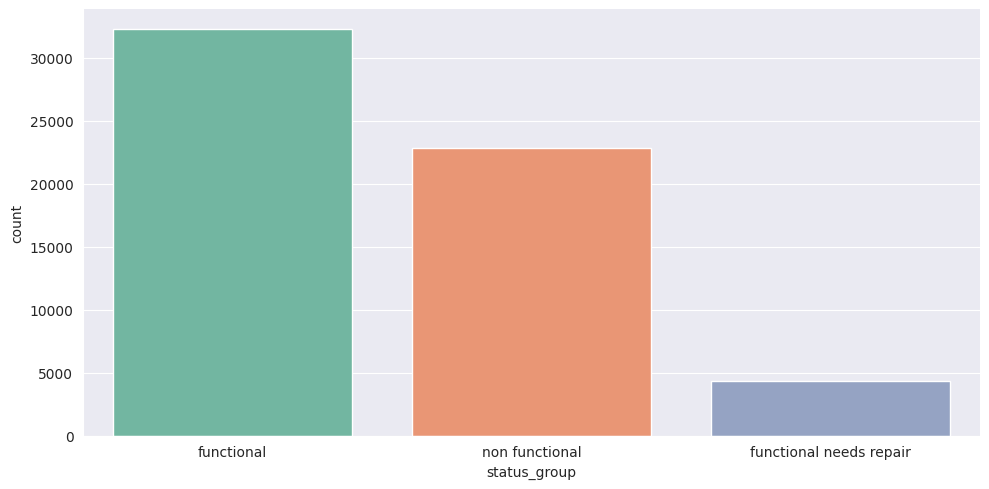

In [192]:
sns.catplot(x='status_group',hue='status_group', data=train_labels, aspect=2, kind='count',palette='Set2',legend=False);
plt.show()


## Data Cleaning

In [193]:
# Listing number of  columns
list(all_data)

['id',
 'amount_tsh',
 'date_recorded',
 'funder',
 'gps_height',
 'installer',
 'longitude',
 'latitude',
 'wpt_name',
 'num_private',
 'basin',
 'subvillage',
 'region',
 'region_code',
 'district_code',
 'lga',
 'ward',
 'population',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'construction_year',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group']

In [194]:
# Counting the number of missing values in each column of the DataFrame.
all_data.isnull().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                   4507
gps_height                  0
                         ... 
source                      0
source_type                 0
source_class                0
waterpoint_type             0
waterpoint_type_group       0
Length: 40, dtype: int64

In [195]:
# --- Subvillage ---
 #counts the number of occurrences of each 'id' within each group,
all_data.groupby(['subvillage'])['id'].count().sort_values(ascending=False)[:10]

subvillage
Shuleni       646
Majengo       631
Madukani      629
Kati          467
Mtakuja       322
Sokoni        294
M             243
Muungano      215
Mbuyuni       210
Songambele    194
Name: id, dtype: int64

In [196]:
# Imputing the NAs to Unknown
all_data.subvillage.fillna(value='other', inplace=True)

# the values which are clear errors (1, A, M, N, ...)
all_data.loc[all_data.subvillage.str.len() == 1, 'subvillage'] = 'other'

In [197]:
# --- Amount tsh: amount of water in the basin ---

# Significant values:
print('max:',all_data.amount_tsh.max())
print('min:',all_data.amount_tsh.min())
print('mean:',all_data.amount_tsh.mean())
print('median:',all_data.amount_tsh.median())

max: 350000.0
min: 0.0
mean: 318.6857043771044
median: 0.0


<Axes: xlabel='amount_tsh'>

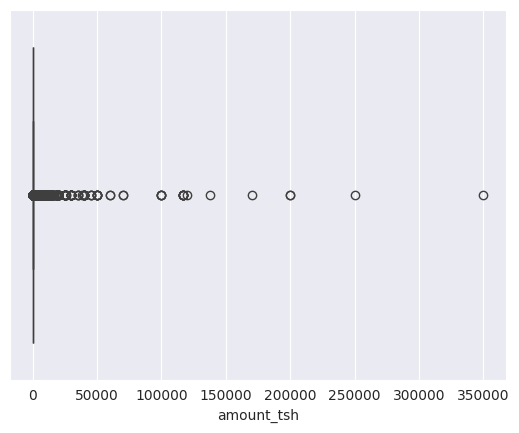

In [198]:
# Distribution
sns.boxplot(x=all_data['amount_tsh'])

In [199]:
# Droping the column because of zero
all_data = all_data.drop('amount_tsh', axis=1)

In [200]:
# --- Date recorded: date in which the row was inserted ---

all_data.date_recorded[:10]

0    2011-03-14
1    2013-03-06
2    2013-02-25
3    2013-01-28
4    2011-07-13
5    2011-03-13
6    2012-10-01
7    2012-10-09
8    2012-11-03
9    2011-08-03
Name: date_recorded, dtype: object

In [201]:
# Spliting it to year and month
all_data['year_recorded'] = all_data.date_recorded.str.slice(0,4)
all_data['month_recorded'] = all_data.date_recorded.str.slice(5,7)

# Convert them to integer
all_data.year_recorded = all_data.year_recorded.astype('float', errors='ignore')
all_data.month_recorded = all_data.month_recorded.astype('float', errors='ignore')

# And drop the date column
all_data = all_data.drop('date_recorded', axis=1)

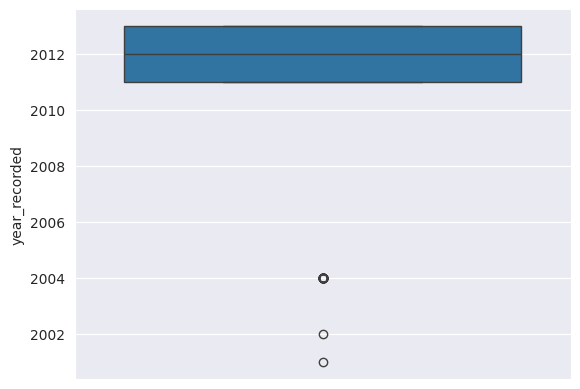

In [202]:
# Distribution
sns.boxplot(all_data.year_recorded);


In [203]:
all_data.groupby(['year_recorded'])['id'].count()

year_recorded
2001.0        1
2002.0        1
2004.0       41
2011.0    35908
2012.0     8089
2013.0    30210
Name: id, dtype: int64

In [204]:
# 2001, 2002 and 2004 are supposed to be errors
all_data.loc[all_data.year_recorded == 2001.0, 'year_recorded'] = 2011
all_data.loc[all_data.year_recorded == 2002.0, 'year_recorded'] = 2012
all_data.loc[all_data.year_recorded == 2004.0, 'year_recorded'] = 2014

<Axes: ylabel='year_recorded'>

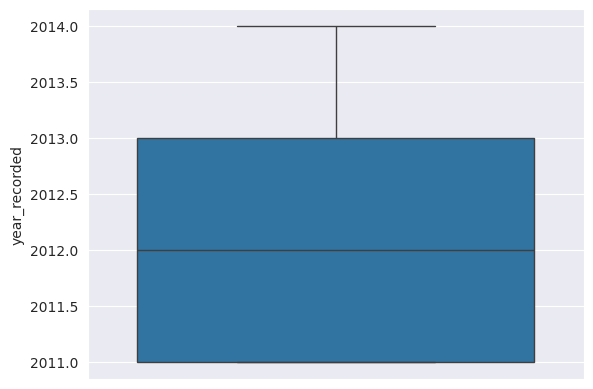

In [205]:
# New distribution
sns.boxplot(all_data.year_recorded)

In [206]:
# --- Funder ---
all_data.groupby(['funder']).size().sort_values(ascending=False)[:10]

funder
Government Of Tanzania    11299
Danida                     3907
Hesawa                     2782
Rwssp                      1703
World Bank                 1701
Kkkt                       1623
World Vision               1562
Unicef                     1324
Tasaf                      1136
Dhv                        1065
dtype: int64

In [207]:
# filling missing values in the 'funder' column with the string 'other'
all_data.funder.fillna('other', inplace=True)

# replaces any values in the 'funder' column with a length of 1 with the string 'other'
all_data.loc[all_data.funder.str.len() == 1, 'funder'] = 'other'



<Axes: xlabel='longitude', ylabel='Density'>

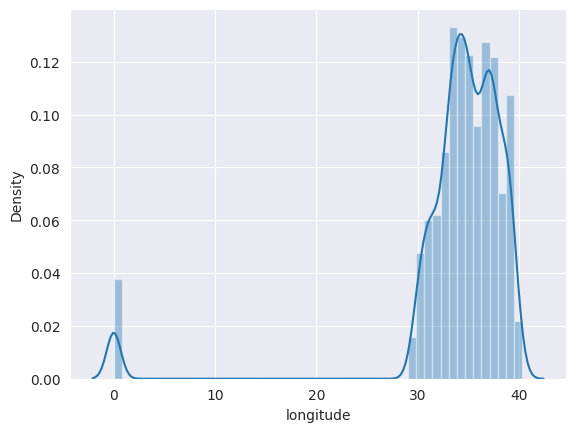

In [208]:
# --- Longitude ---
sns.distplot(all_data.longitude)


In [209]:
# longitude equals zero, not possible

# Setting the 0 values to NA
all_data.loc[all_data.longitude == 0, 'longitude'] = np.nan
all_data.longitude.isnull().sum()

2269

In [210]:
# Create KNN imputer object
knn_imputer = KNNImputer(n_neighbors=5)

# Convert the DataFrame to a NumPy array
data_array = all_data[['longitude']].to_numpy()

# Performing  KNN imputation
imputed_values = knn_imputer.fit_transform(data_array)

# Updating the DataFrame with the imputed values
all_data['longitude'] = imputed_values


# Check if there are still any missing values in the 'longitude' column
all_data.longitude.isnull().sum()

0

In [211]:
#rounding longitude to 2 decimals
all_data.longitude = all_data.longitude.round(2)

<Axes: xlabel='longitude', ylabel='Density'>

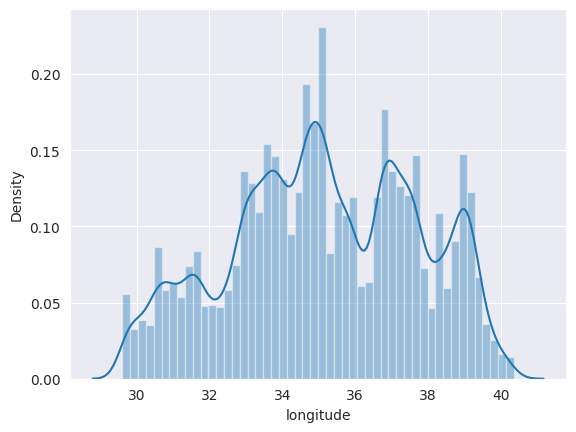

In [212]:
sns.distplot(all_data.longitude) #Better now

<Axes: xlabel='latitude', ylabel='Density'>

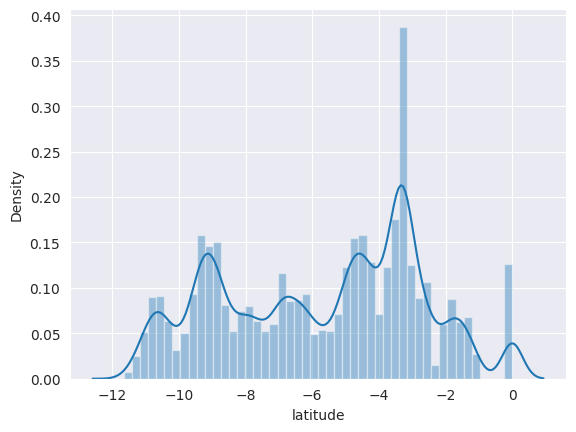

In [213]:
# --- Latitude ---

# Rounding latitude to 2 decimals
all_data.latitude = all_data.latitude.round(2)

sns.distplot(all_data.latitude)

In [214]:
knn_imputer = KNNImputer(n_neighbors=5)

# Convert the DataFrame to a NumPy array
all_data_array = all_data[['latitude']].to_numpy()

# Perform KNN imputation
imputed_values = knn_imputer.fit_transform(all_data_array)
all_data['latitude'] = imputed_values

# Check if there are still any missing values in the 'longitude' column
all_data.latitude.isnull().sum()

0

<Axes: xlabel='latitude', ylabel='Density'>

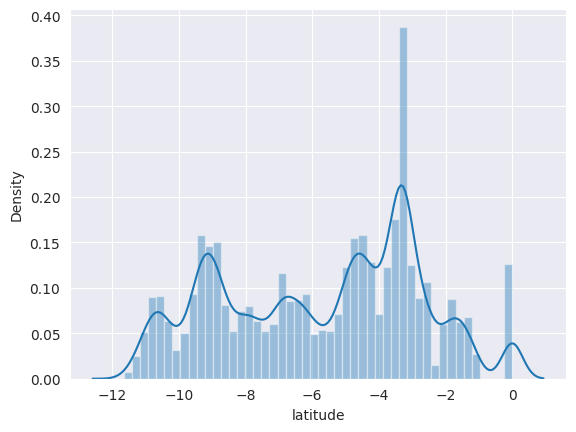

In [215]:
#checking plot again
sns.distplot(all_data.latitude)

<Axes: xlabel='gps_height', ylabel='Density'>

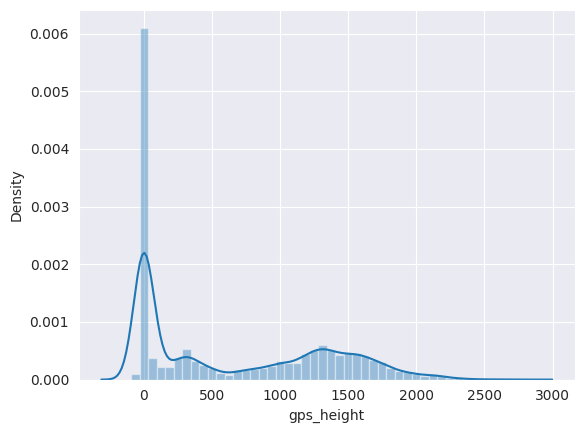

In [216]:
# --- GPS Height ---
sns.distplot(all_data.gps_height)

In [217]:
# Too many zeros, let's do as for latitude and longitude
all_data.loc[all_data.gps_height == 0, 'gps_height'] = np.nan
all_data.gps_height.isnull().sum()

25649

In [218]:
# Create KNN imputer object
knn_imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Convert the DataFrame to a NumPy array (KNNImputer works with NumPy arrays)
all_data_array = all_data[['gps_height']].to_numpy()

# Perform KNN imputation
imputed_values = knn_imputer.fit_transform(all_data_array)

# Update the DataFrame with the imputed values
all_data['gps_height'] = imputed_values

# Check if there are still any missing values in the 'longitude' column
all_data.gps_height.isnull().sum()

0

<Axes: xlabel='gps_height', ylabel='Density'>

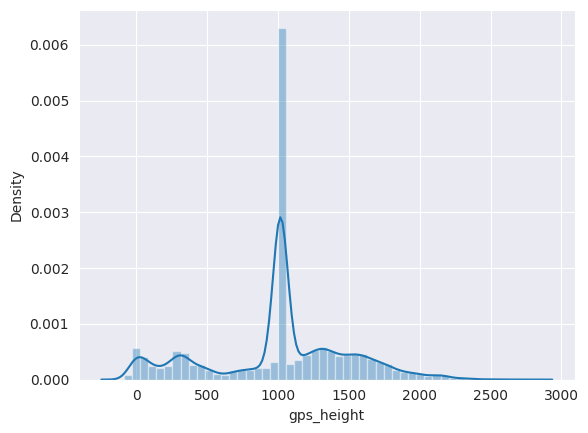

In [357]:
# Good now
#all_data.gps_height.describe()
sns.distplot(all_data.gps_height)

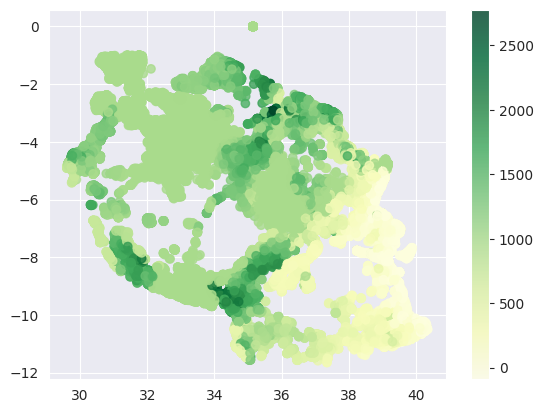

In [220]:
# Plot of gps coordinates colored by gps height.
plt.scatter(all_data.longitude, all_data.latitude, alpha = .8, c = all_data.gps_height, cmap = 'YlGn')
cbar = plt.colorbar()

In [221]:
# --- Installer ---
all_data.groupby(['installer'])['id'].count().sort_values(ascending=False)[:10]

installer
DWE           21751
Government     2282
RWE            1498
Commu          1347
DANIDA         1305
KKKT           1120
Hesawa         1070
0               980
TCRS            887
CES             765
Name: id, dtype: int64

In [222]:
# Let's impute them as unknown for now
all_data.installer.fillna('other', inplace=True)

# And all the values which are clear errors (1, A, M, N, ...)
all_data.loc[all_data.installer.str.len() == 1, 'installer'] = 'other'

all_data.installer.isnull().sum()

0

In [223]:
# --- wpt_name ---
all_data.groupby(['wpt_name']).size().sort_values(ascending=False)[1:10]

wpt_name
Shuleni            2183
Zahanati           1034
Msikitini           647
Kanisani            390
Sokoni              328
Bombani             323
Ofisini             321
School              260
Shule Ya Msingi     247
dtype: int64

In [224]:
# Different values, we can drop wpt_name
all_data = all_data.drop('wpt_name', axis=1)

<Axes: ylabel='num_private'>

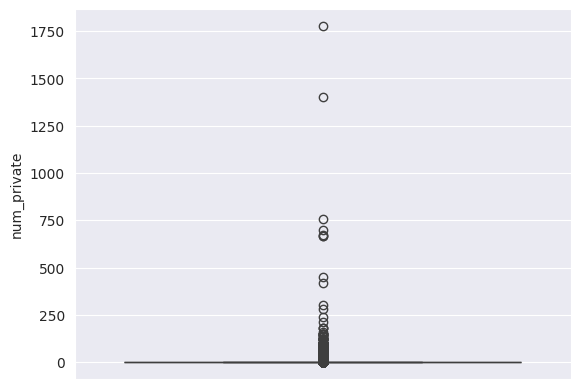

In [225]:

sns.boxplot(all_data.num_private)

In [226]:
# Droppping this column
all_data = all_data.drop('num_private', axis=1)

In [227]:
# --- Basin: geographical basin ---
all_data.groupby(['basin']).size() # Everything good here

basin
Internal                    9642
Lake Nyasa                  6332
Lake Rukwa                  3059
Lake Tanganyika             8052
Lake Victoria              12871
Pangani                    11143
Rufiji                      9987
Ruvuma / Southern Coast     5587
Wami / Ruvu                 7577
dtype: int64

In [228]:
# --- Region ---
all_data.groupby(['region']).size().sort_values(ascending=False)[:10] # Everything good here

region
Iringa         6599
Shinyanga      6293
Mbeya          5758
Kilimanjaro    5494
Morogoro       5038
Kagera         4174
Arusha         4111
Mwanza         3897
Kigoma         3533
Pwani          3331
dtype: int64

In [229]:
# --- Region code ---
all_data.groupby(['region_code']).size().sort_values(ascending=False)[:10] # Everything good here

region_code
11    6608
17    6334
12    5759
3     5494
5     5079
18    4183
19    3824
2     3709
16    3533
10    3306
dtype: int64

In [230]:
all_data.groupby(['region','region_code']).size()[:10]

region         region_code
Arusha         2              3709
               24              402
Dar es Salaam  7              1020
Dodoma         1              2779
Iringa         11             6599
Kagera         18             4174
Kigoma         16             3533
Kilimanjaro    3              5494
Lindi          8               375
               18                9
dtype: int64

In [231]:
# region_code has more informations, let's drop region column
all_data = all_data.drop('region', axis=1)

In [232]:
# --- District code ---
all_data.groupby(['district_code']).size().sort_values(ascending=False)[:10] # Everything good here

district_code
1     15299
2     13929
3     12521
4     11253
5      5428
6      5108
7      4166
8      1282
30     1256
33     1063
dtype: int64

In [233]:
all_data.groupby(['region_code','district_code']).size()[:10]

region_code  district_code
1            0                  27
             1                1107
             3                 460
             4                 439
             5                 467
             6                 279
2            1                 226
             2                1460
             3                 143
             5                 245
dtype: int64

In [234]:
# district code same in different regions, let's drop it
all_data = all_data.drop('district_code', axis=1)

In [235]:
# --- Lga ---
all_data.groupby(['lga']).size().sort_values(ascending=False)[:10]

lga
Njombe          3128
Moshi Rural     1566
Arusha Rural    1521
Bariadi         1485
Rungwe          1381
Kilosa          1368
Kasulu          1322
Mbozi           1286
Bagamoyo        1263
Meru            1244
dtype: int64

In [236]:
all_data.groupby(['region_code', 'lga']).size()[:10] # Everything good here

region_code  lga         
1            Bahi             279
             Chamwino         439
             Dodoma Urban     467
             Kondoa           644
             Kongwa           460
             Mpwapwa          490
2            Arusha Rural    1521
             Arusha Urban      82
             Longido          391
             Meru            1244
dtype: int64

<Axes: xlabel='population', ylabel='Density'>

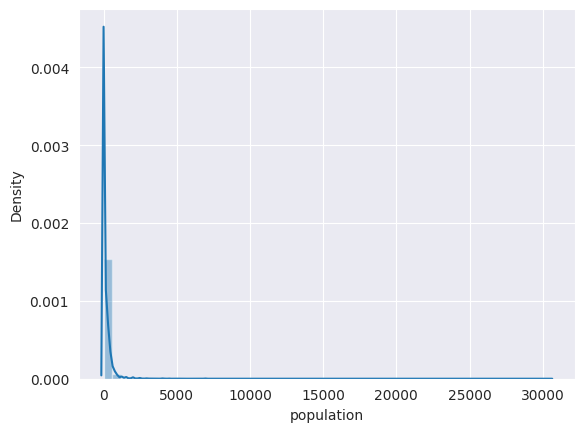

In [237]:
# --- Population ---
sns.distplot(all_data.population)

In [238]:
all_data.groupby(['population']).size().sort_values(ascending=False)[:10]
# Zero is not possible, let's impute by averages

population
0      26834
1       8782
200     2370
150     2328
250     2087
300     1842
50      1437
100     1419
500     1274
350     1252
dtype: int64

In [239]:
# Too many zeros, imputing them by averages for the geographical coordinates
all_data.loc[all_data.population == 0, 'population'] = np.nan
all_data.population.isnull().sum()

26834

In [240]:
# by subvillage
all_data.population.fillna(all_data.groupby(['subvillage'])['population'].transform('median'), inplace=True)
all_data.population.isnull().sum()

19359

In [241]:
# by ward
all_data.population.fillna(all_data.groupby(['ward'])['population'].transform('median'), inplace=True)
all_data.population.isnull().sum()

2364

In [242]:
# by lga
all_data.population.fillna(all_data.groupby(['lga'])['population'].transform('median'), inplace=True)
all_data.population.isnull().sum()

114

In [243]:
# by region_code
all_data.population.fillna(all_data.groupby(['region_code'])['population'].transform('median'), inplace=True)
all_data.population.isnull().sum()

0

<Axes: xlabel='population', ylabel='Density'>

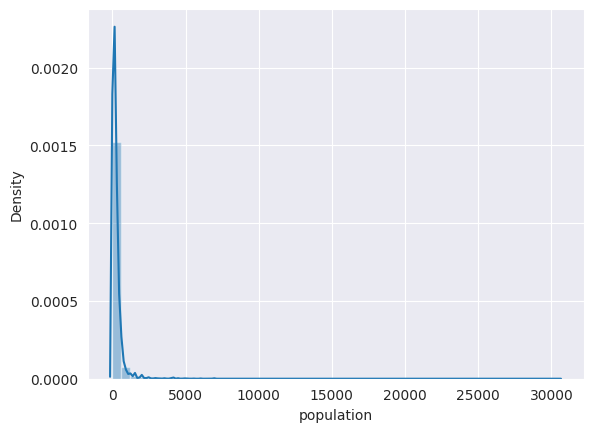

In [244]:
# distribution still vety skewed to the right => taking the log
sns.distplot(all_data.population)

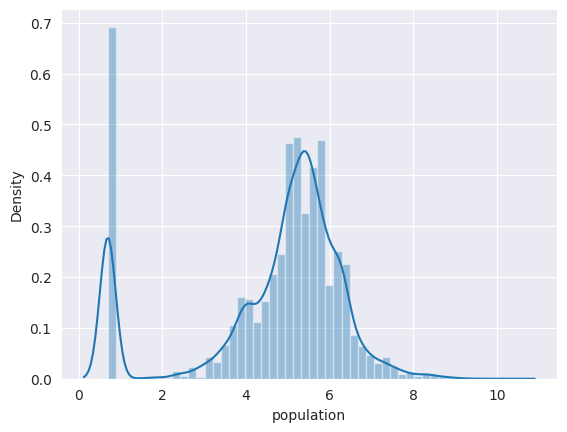

In [245]:
# Looks better now, still not the best
sns.distplot(np.log1p(all_data.population));

In [246]:
# Let's create a new column with the log of population
all_data['population_log'] = np.log1p(all_data.population)

# And drop population
all_data = all_data.drop('population', axis=1)

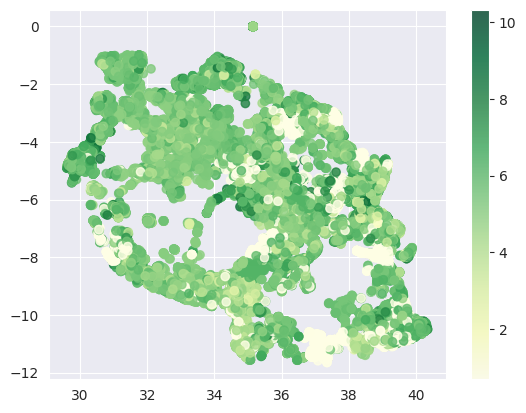

In [247]:
# Population density by geograohical coordinates
plt.scatter(all_data.longitude, all_data.latitude, alpha = .8, c = all_data.population_log, cmap = 'YlGn')
cbar = plt.colorbar()

In [248]:
# --- Public meeting ---
all_data.groupby(['public_meeting']).size()

public_meeting
False     6346
True     63749
dtype: int64

In [249]:
# Setting True to 1 and False to 0
all_data.loc[all_data.public_meeting == True, 'public_meeting'] = 1
all_data.loc[all_data.public_meeting == False, 'public_meeting'] = 0

# converting the column to integer
all_data.public_meeting = all_data.public_meeting.astype('int', errors='ignore')

# The ratio True:false is 10:1, so imputing all the NAs as True
all_data.public_meeting.fillna(1, inplace=True)
all_data.public_meeting.isnull().sum()

0

In [250]:
# --- Recorded by ---
all_data.recorded_by.unique()

array(['GeoData Consultants Ltd'], dtype=object)

In [251]:
#Only one institution recording, we can drop the column
all_data = all_data.drop('recorded_by', axis=1)

In [252]:
# --- Management ---

# let's impute them NAs as other for now
all_data.scheme_management.fillna('other', inplace=True)
all_data.scheme_management.isnull().sum()

0

In [253]:
# --- Scheme management ---
all_data.groupby(['scheme_management']).size().sort_values(ascending=False)[:10]

scheme_management
VWC                 45917
WUG                  6496
other                4847
Water authority      3975
WUA                  3551
Water Board          3462
Parastatal           2124
Company              1341
Private operator     1326
Other                 996
dtype: int64

In [254]:
# --- Scheme name ---
all_data.groupby(['scheme_name']).size().sort_values(ascending=False)[:10]

scheme_name
K                              858
Borehole                       704
Chalinze wate                  501
M                              490
DANIDA                         483
Government                     395
Ngana water supplied scheme    335
wanging'ombe water supply s    323
Bagamoyo wate                  296
wanging'ombe supply scheme     284
dtype: int64

In [255]:
all_data.groupby(['scheme_management','scheme_name']).size()[:10]

scheme_management  scheme_name              
Company            BFFS                           1
                   BSF water supplying            1
                   Bagamoyo Wate                 76
                   Bagamoyo wate                272
                   Borehole                       1
                   Borehole drilling project      1
                   Bulamba piped scheme           3
                   Burieni water supply           1
                   Doe water supply               4
                   EKTM 2 water  supply           1
dtype: int64

In [256]:
all_data.groupby(['scheme_management','management']).size()[:10]

scheme_management  management      
Company            company             848
                   other                 2
                   parastatal           30
                   private operator    287
                   vwc                 173
                   wug                   1
Other              other               690
                   parastatal            1
                   private operator     78
                   trust                 1
dtype: int64

In [257]:
# Dropping scheme_name, too many levels
all_data = all_data.drop('scheme_name', axis=1)

In [258]:
# --- permit ---
all_data.groupby(['permit'])['id'].count().sort_values(ascending=False)

permit
True     48606
False    21851
Name: id, dtype: int64

In [259]:
# we can drop the column
all_data = all_data.drop('permit', axis=1)

<Axes: xlabel='construction_year', ylabel='Density'>

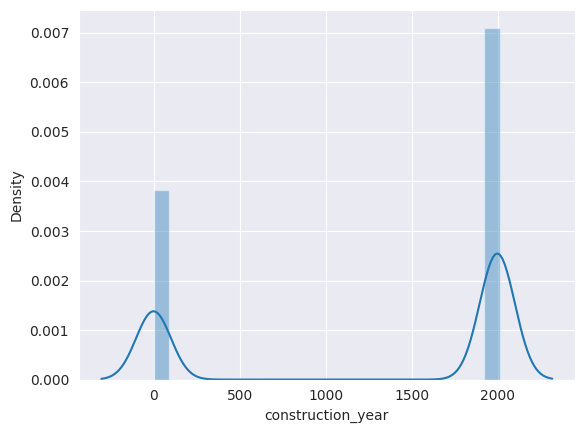

In [260]:
# --- Construction year ---
sns.distplot(all_data.construction_year)

In [261]:
# A lot of zeros, let's go again with geographical medians
all_data.loc[all_data.construction_year == 0, 'construction_year'] = np.nan
all_data.construction_year.isnull().sum()

25969

In [262]:
# by subvillage
all_data.construction_year.fillna(all_data.groupby(['subvillage'])['construction_year'] \
                                  .transform('median'), inplace=True)

all_data.construction_year.isnull().sum()

18875

In [263]:
# by ward
all_data.construction_year.fillna(all_data.groupby(['ward'])['construction_year'] \
                                  .transform('median'), inplace=True)

all_data.construction_year.isnull().sum()

2205

In [264]:
# by lga
all_data.construction_year.fillna(all_data.groupby(['lga'])['construction_year'] \
                                  .transform('median'), inplace=True)

all_data.construction_year.isnull().sum()

114

In [265]:
# by region_code
all_data.construction_year.fillna(all_data.groupby(['region_code'])['construction_year'] \
                                  .transform('median'), inplace=True)

all_data.construction_year.isnull().sum()

0

In [266]:
#Removing decimals from the year
all_data.construction_year = all_data.construction_year.round(0)

<Axes: xlabel='construction_year', ylabel='Density'>

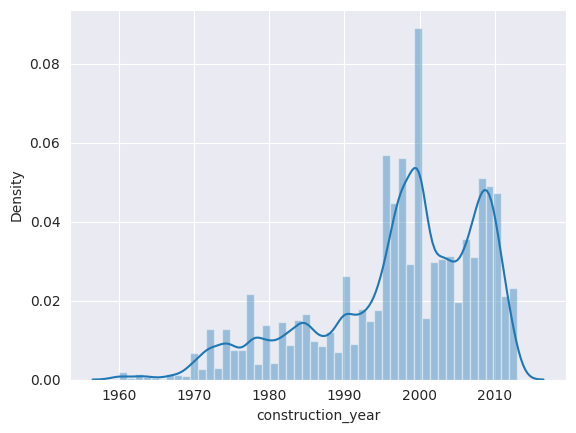

In [267]:
# Let's plot it again for observation
sns.distplot(all_data.construction_year) # Good now

In [268]:
# --- Extraction type ---
all_data.groupby(['extraction_type','extraction_type_group','extraction_type_class']).size()[:10] # All good here

extraction_type  extraction_type_group  extraction_type_class
afridev          afridev                handpump                  2208
cemo             other motorpump        motorpump                  108
climax           other motorpump        motorpump                   41
gravity          gravity                gravity                  33263
india mark ii    india mark ii          handpump                  3029
india mark iii   india mark iii         handpump                   135
ksb              submersible            submersible               1790
mono             mono                   motorpump                 3628
nira/tanira      nira/tanira            handpump                 10205
other            other                  other                     8102
dtype: int64

In [269]:
#keeping only extraction_type_class
all_data = all_data.drop('extraction_type', axis=1)
all_data = all_data.drop('extraction_type_group', axis=1)

# And all the values which are clear errors (1, A, M, N, ...)
all_data.loc[all_data.scheme_management == 'None', 'scheme_management'] = 'other'

In [270]:
# --- Payment and payment type---
all_data.groupby(['payment','payment_type']).size() # All good here

payment                payment_type
never pay              never pay       31712
other                  other            1314
pay annually           annually         4570
pay monthly            monthly         10397
pay per bucket         per bucket      11266
pay when scheme fails  on failure       4842
unknown                unknown         10149
dtype: int64

In [271]:
# These are redundant, dropping payment column
all_data = all_data.drop('payment', axis=1)

In [272]:
# --- Water quality ---
all_data.groupby(['water_quality','quality_group']).size() # All good here

water_quality       quality_group
coloured            colored            623
fluoride            fluoride           244
fluoride abandoned  fluoride            23
milky               milky             1005
salty               salty             6082
salty abandoned     salty              423
soft                good             63505
unknown             unknown           2345
dtype: int64

In [273]:
# Water quality has more information, keeping it and droping quality_group
all_data = all_data.drop('quality_group', axis=1)

In [274]:
# --- Quantity and quantity_group ---
all_data.groupby(['quantity','quantity_group'])['id'].size() # All good here

quantity      quantity_group
dry           dry                7782
enough        enough            41522
insufficient  insufficient      18896
seasonal      seasonal           5075
unknown       unknown             975
Name: id, dtype: int64

In [275]:
# two columns are equal, let's drop quantity_group
all_data = all_data.drop('quantity_group', axis=1)

In [276]:
# --- Source ---
all_data.groupby(['source','source_type','source_class']).size() # All good here

source                source_type           source_class
dam                   dam                   surface           840
hand dtw              borehole              groundwater      1108
lake                  river/lake            surface           950
machine dbh           borehole              groundwater     13822
other                 other                 unknown           261
rainwater harvesting  rainwater harvesting  surface          2863
river                 river/lake            surface         11964
shallow well          shallow well          groundwater     21140
spring                spring                groundwater     21216
unknown               other                 unknown            86
dtype: int64

In [277]:
# Source and sopurce_type are similar, keeping source as it has more informations
all_data = all_data.drop('source_type', axis=1)

In [278]:
# --- Water point type ---
all_data.groupby(['waterpoint_type','waterpoint_type_group']).size() # All good here

waterpoint_type              waterpoint_type_group
cattle trough                cattle trough              150
communal standpipe           communal standpipe       35628
communal standpipe multiple  communal standpipe        7611
dam                          dam                          8
hand pump                    hand pump                21884
improved spring              improved spring            959
other                        other                     8010
dtype: int64

In [279]:
# The two columns are equal, let's drop waterpoint_type_group
all_data = all_data.drop('waterpoint_type_group', axis=1)

## Feature Engineering

<Axes: xlabel='age', ylabel='Density'>

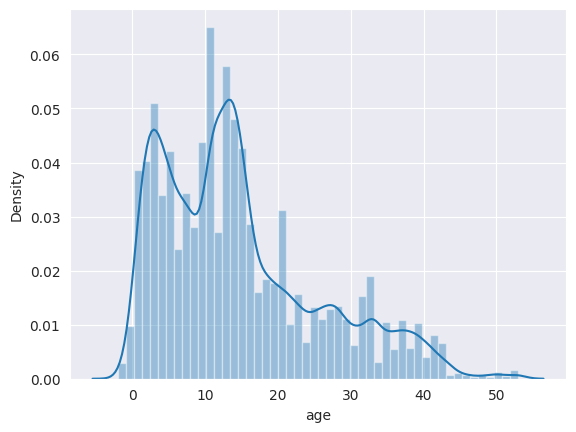

In [280]:
# --- Age column ---

# Computed the age when the status was recorded as year_recorded - year_built
all_data['age'] = all_data.year_recorded - all_data.construction_year

sns.distplot(all_data.age)

In [281]:
# Ages are seem to be < 0 not possible, imputing those to age 1
all_data.loc[all_data.age < 0, 'age'] = 1

In [282]:
# --- season ---

# Jan and Feb short dry season
# long rains lasts from about March to May
# long dry season lasts from June to October
# During November and December there's short rains

all_data.loc[(all_data.month_recorded <= 2) & (all_data.month_recorded >= 1), 'season'] = 1
all_data.loc[(all_data.month_recorded <= 5) & (all_data.month_recorded >= 3), 'season'] = 2
all_data.loc[(all_data.month_recorded <= 10) & (all_data.month_recorded >= 6), 'season'] = 3
all_data.loc[(all_data.month_recorded <= 12) & (all_data.month_recorded >= 11), 'season'] = 4


all_data.groupby(['season']).size()

season
1.0    23384
2.0    27802
3.0    20610
4.0     2454
dtype: int64

## Exploration

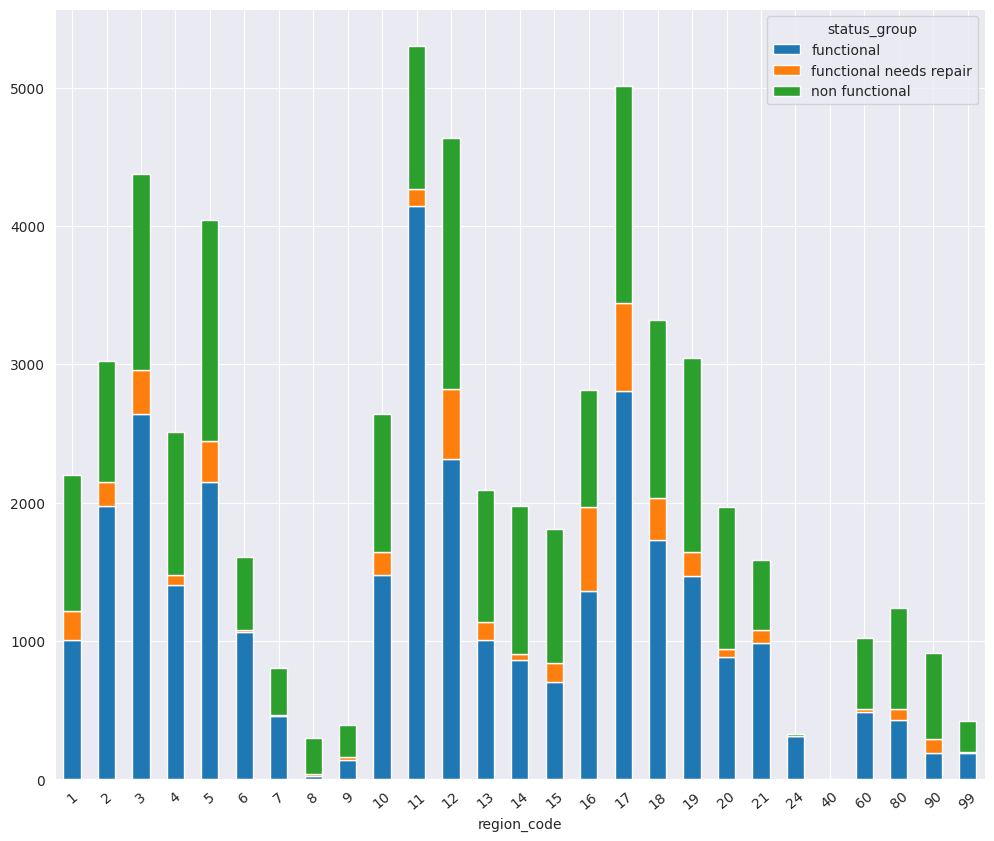

In [283]:
# Variables with respect to status group

# df for plotting by merging train data and labels
plot_df = all_data[0:len(train_data)]
plot_df = plot_df.merge(train_labels, how='inner', on='id')

# Different regions affect the status?
plot = plot_df.groupby(['region_code', 'status_group']) \
               .quantity \
               .count() \
               .unstack()

plot.plot(kind='bar', stacked=True, figsize=(12, 10), rot=40);



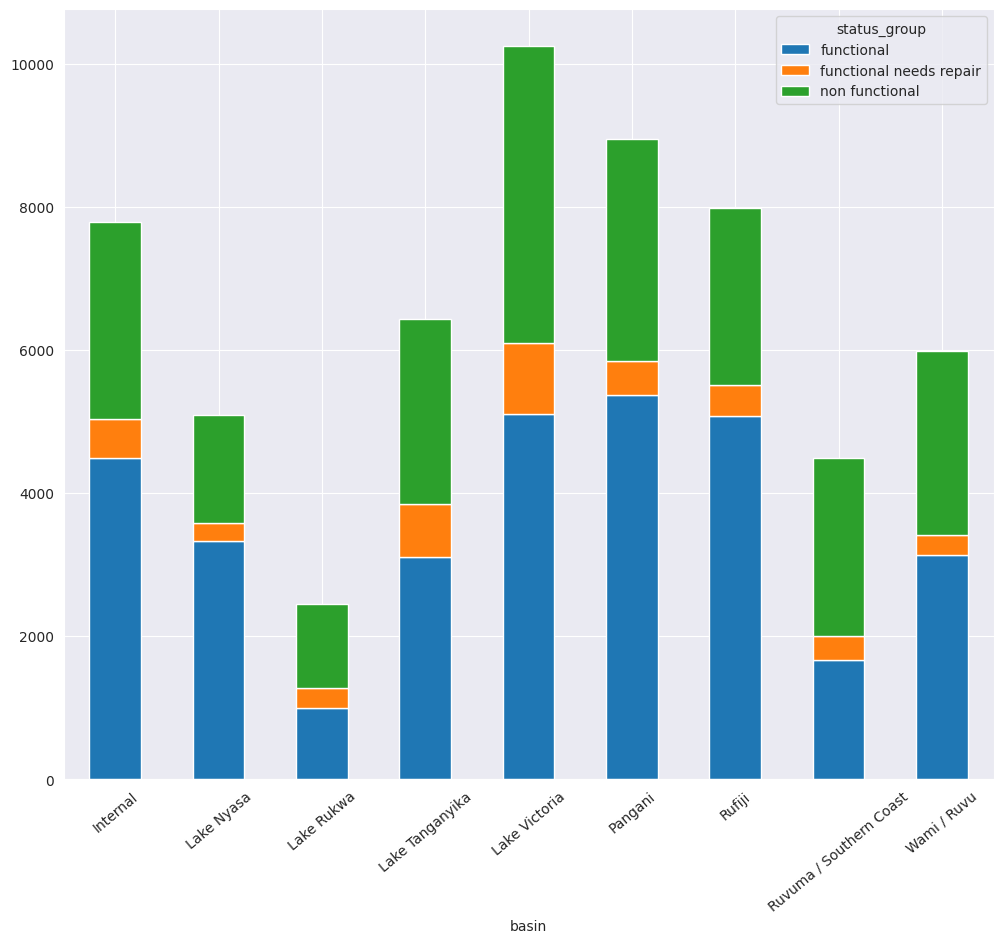

In [284]:
# Different basin
plot = plot_df.groupby(['basin', 'status_group']) \
               .quantity \
               .count() \
               .unstack()

plot.plot(kind='bar', stacked=True, figsize=(12, 10), rot=40);

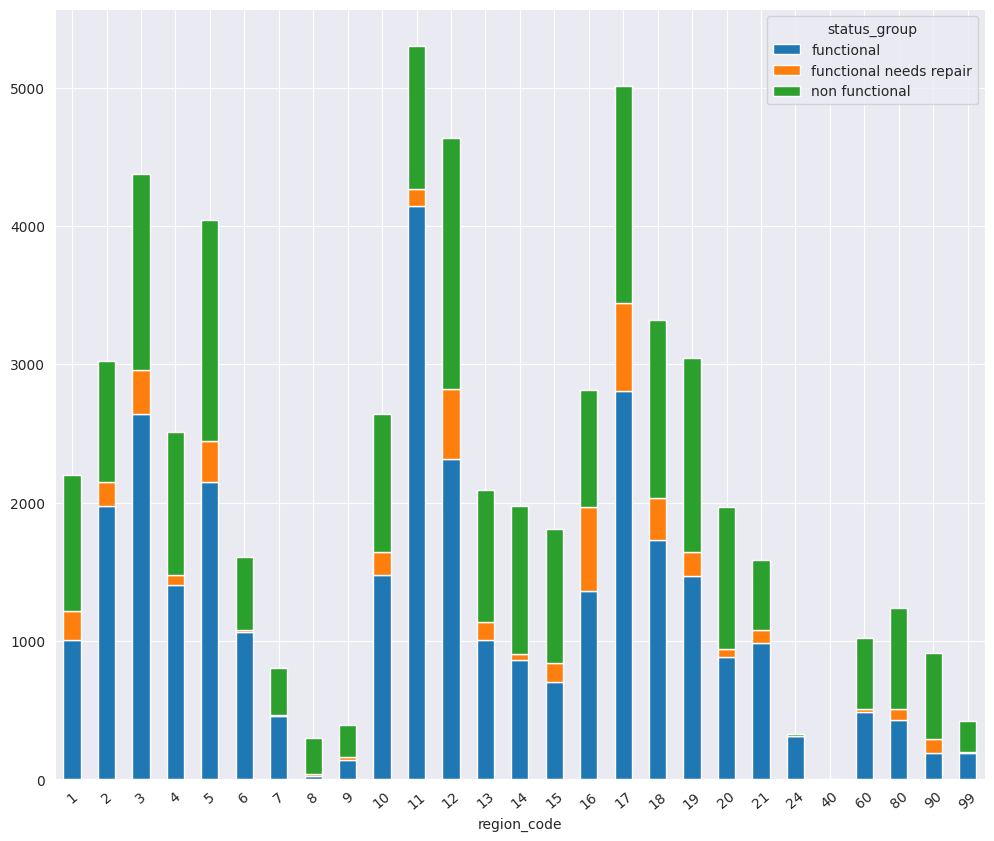

In [285]:
# Different region
plot = plot_df.groupby(['region_code', 'status_group']) \
               .quantity \
               .count() \
               .unstack()

plot.plot(kind='bar', stacked=True, figsize=(12, 10), rot=40);

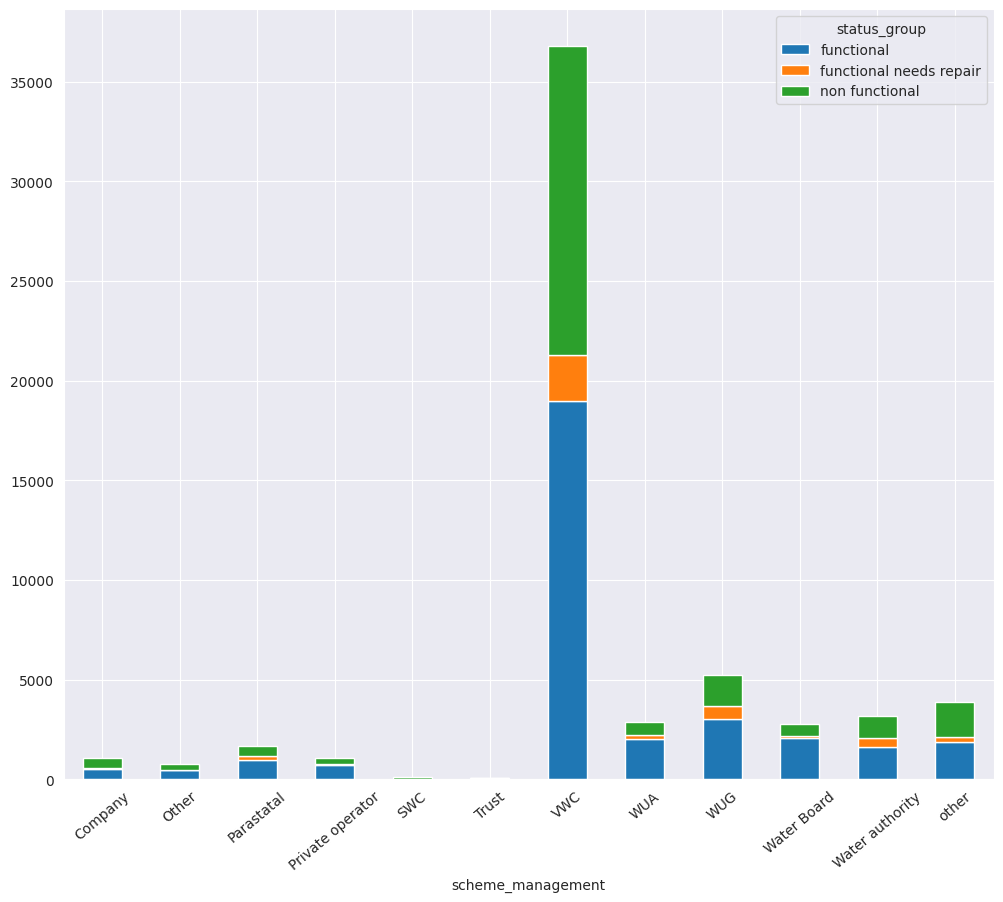

In [286]:
# Different scheme_management
plot = plot_df.groupby(['scheme_management', 'status_group']) \
               .quantity \
               .count() \
               .unstack()

plot.plot(kind='bar', stacked=True, figsize=(12, 10), rot=40);

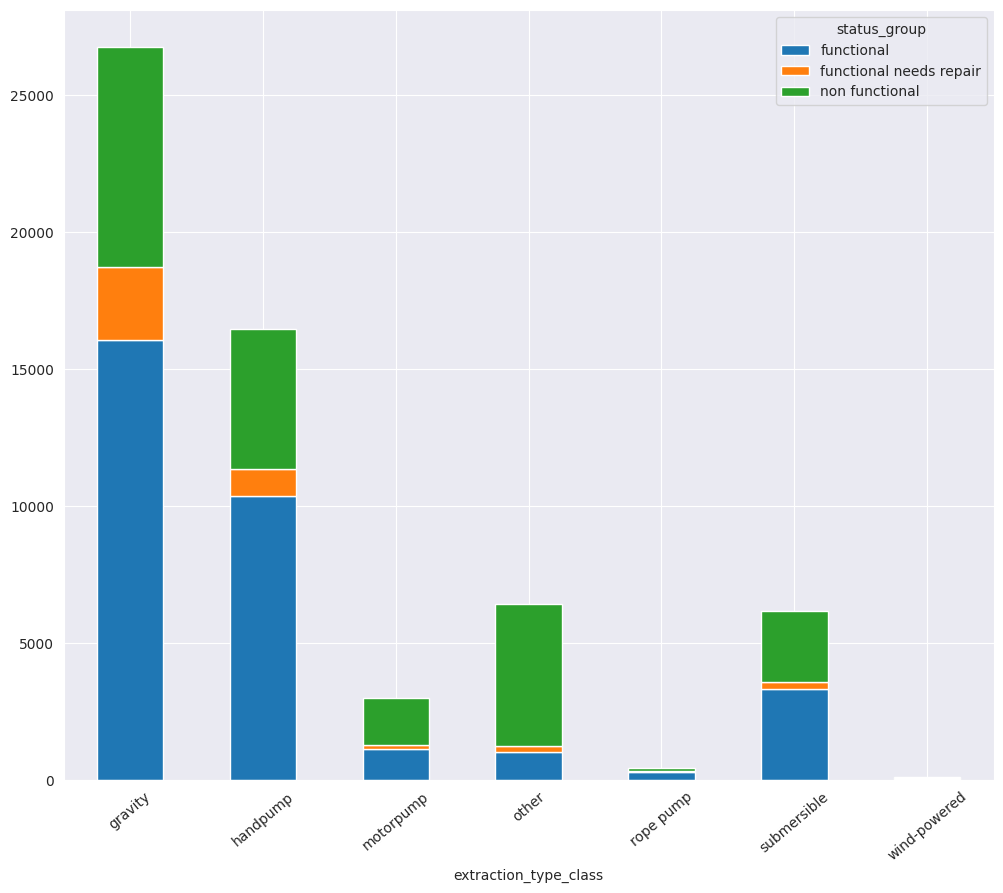

In [287]:
# Different extraction_type_class
plot = plot_df.groupby(['extraction_type_class', 'status_group']) \
               .quantity \
               .count() \
               .unstack()

plot.plot(kind='bar', stacked=True, figsize=(12, 10), rot=40);

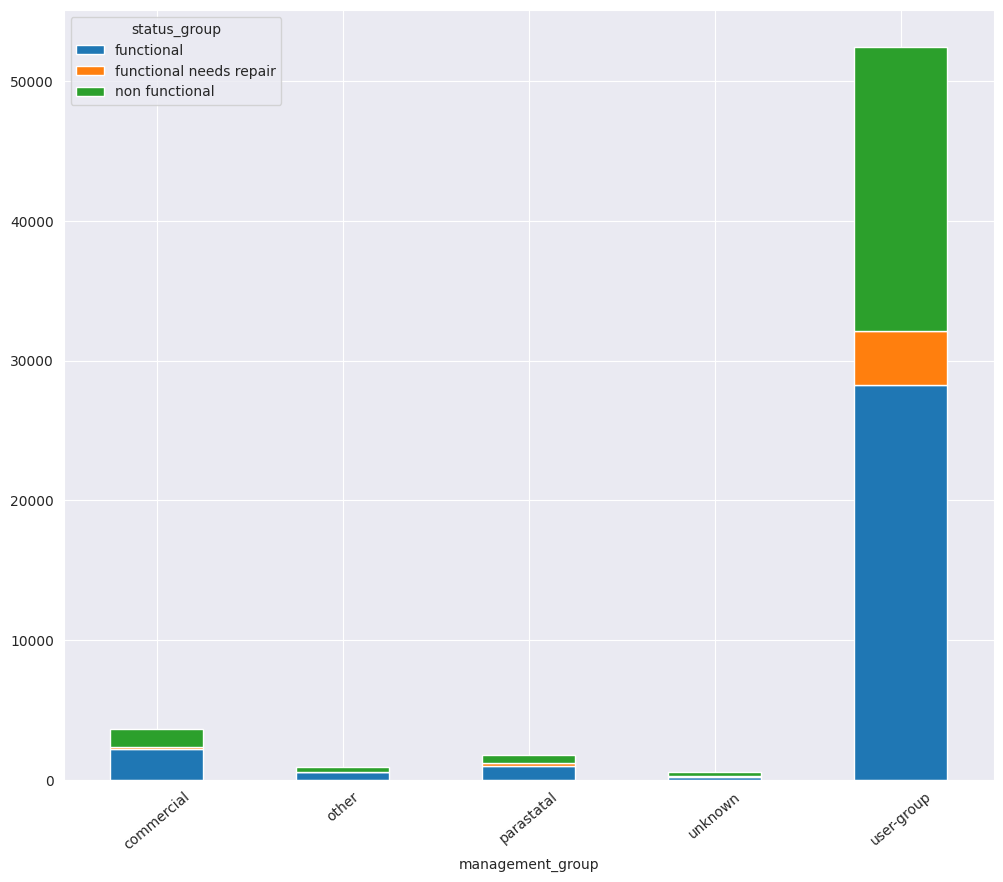

In [288]:
# Different management_group
plot = plot_df.groupby(['management_group', 'status_group']) \
               .quantity \
               .count() \
               .unstack()

plot.plot(kind='bar', stacked=True, figsize=(12, 10), rot=40);

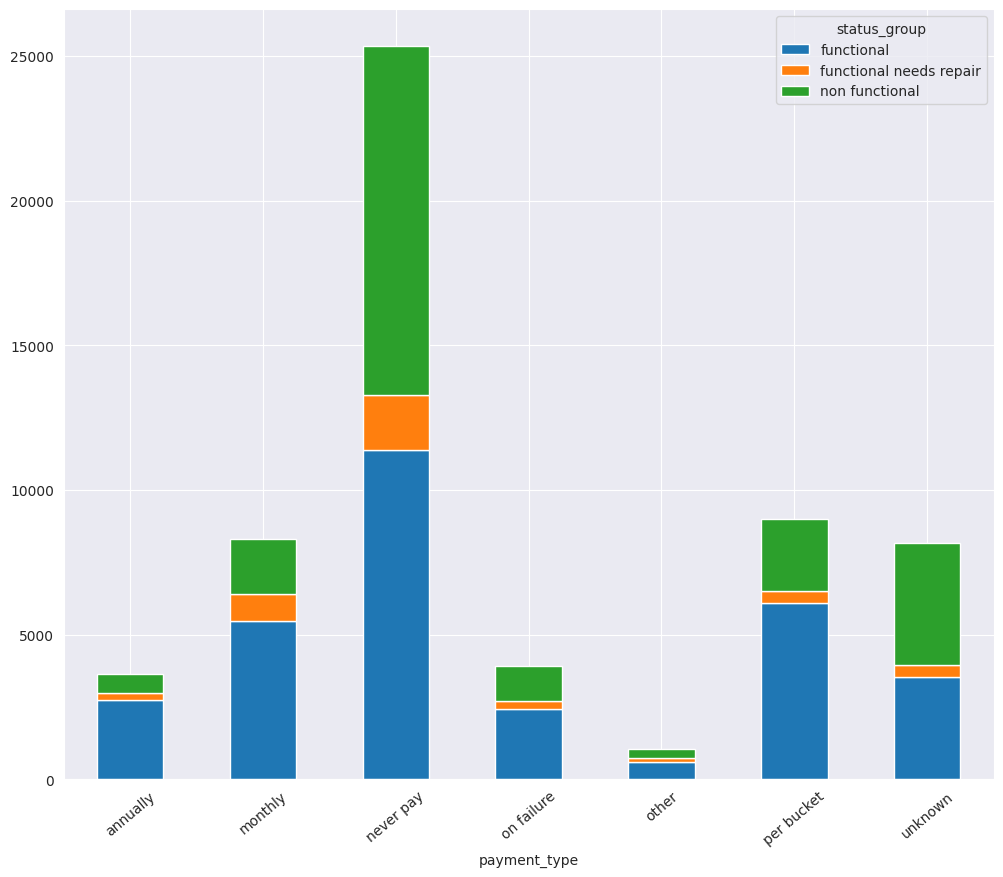

In [289]:
# Different extraction_type_class
plot = plot_df.groupby(['payment_type', 'status_group']) \
               .quantity \
               .count() \
               .unstack()

plot.plot(kind='bar', stacked=True, figsize=(12, 10), rot=40);

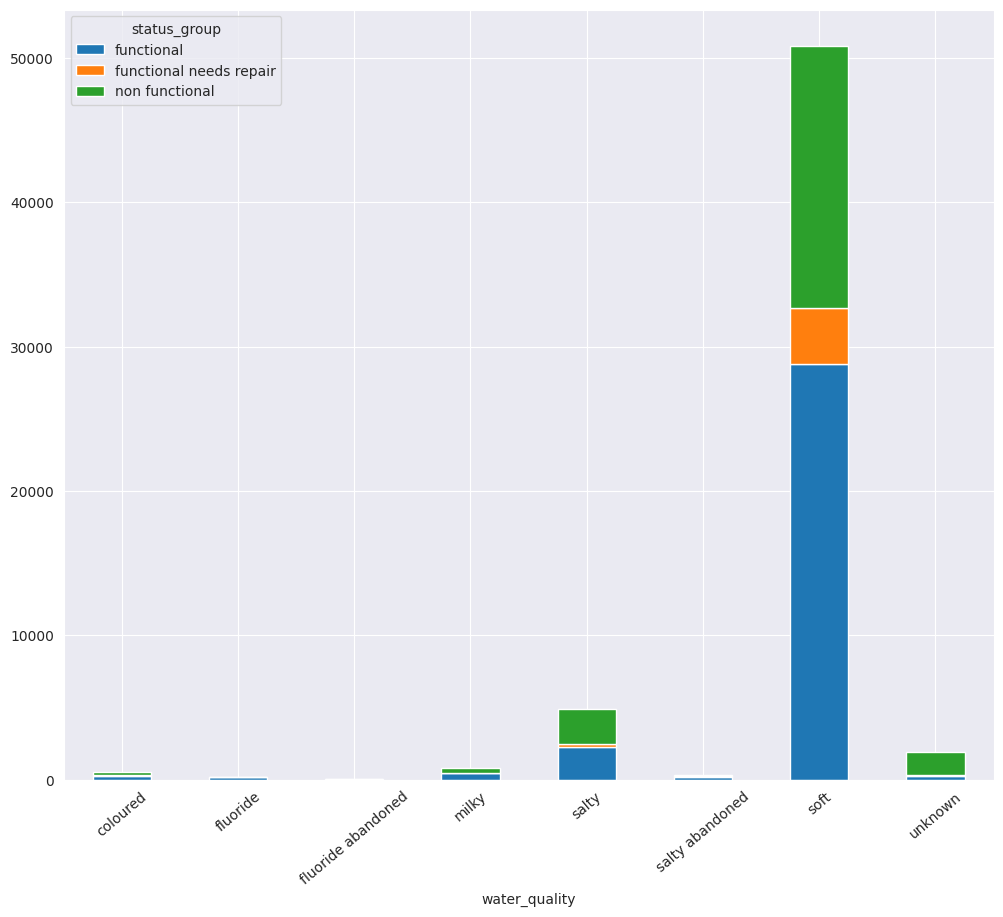

In [290]:
# Different water quality
plot = plot_df.groupby(['water_quality', 'status_group']) \
               .quantity \
               .count() \
               .unstack()

plot.plot(kind='bar', stacked=True, figsize=(12, 10), rot=40);

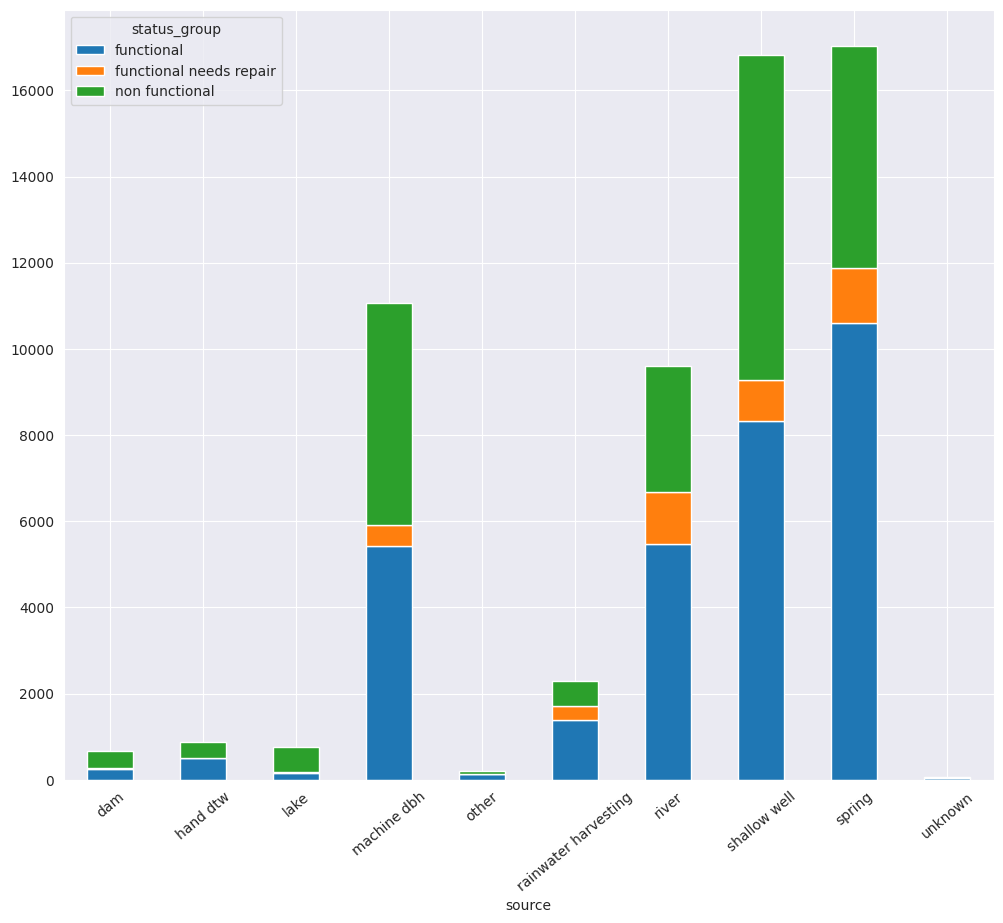

In [291]:
# Different sources
plot = plot_df.groupby(['source', 'status_group']) \
               .quantity \
               .count() \
               .unstack()

plot.plot(kind='bar', stacked=True, figsize=(12, 10), rot=40);

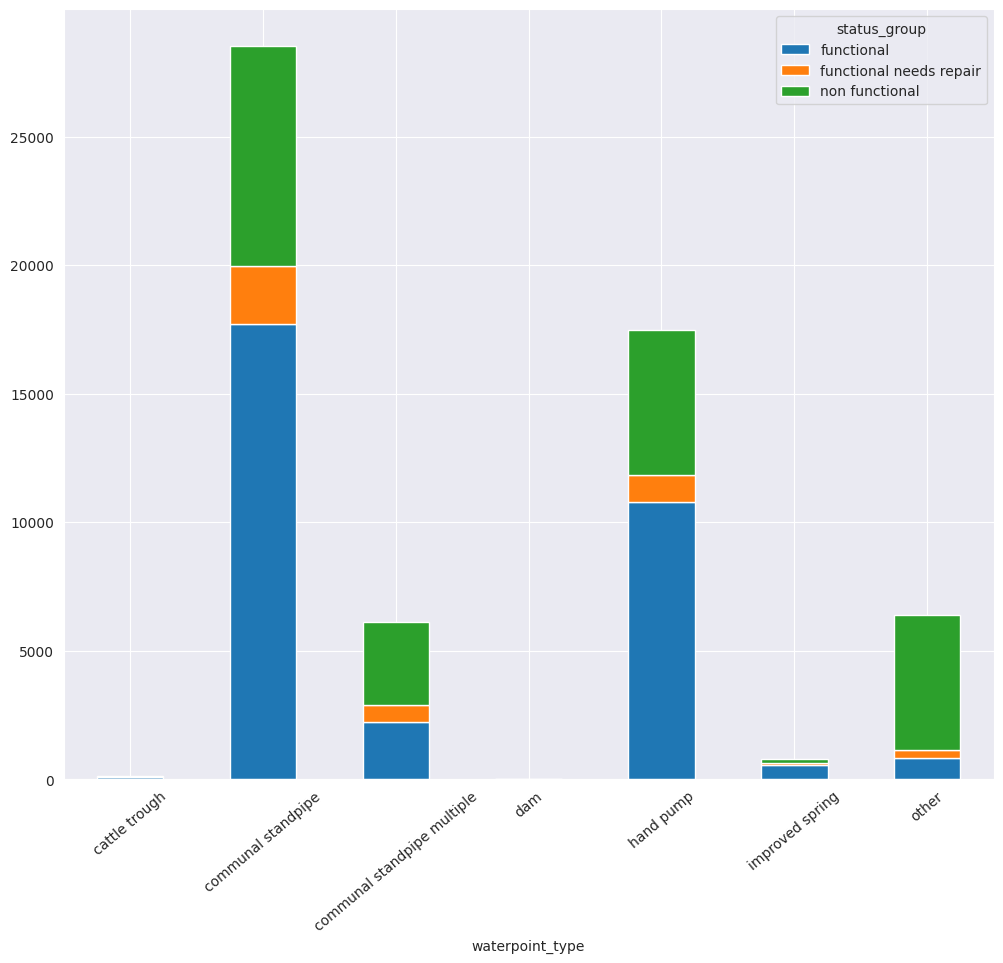

In [292]:
# Different waterpoints
plot = plot_df.groupby(['waterpoint_type', 'status_group']) \
               .quantity \
               .count() \
               .unstack()

plot.plot(kind='bar', stacked=True, figsize=(12, 10), rot=40);

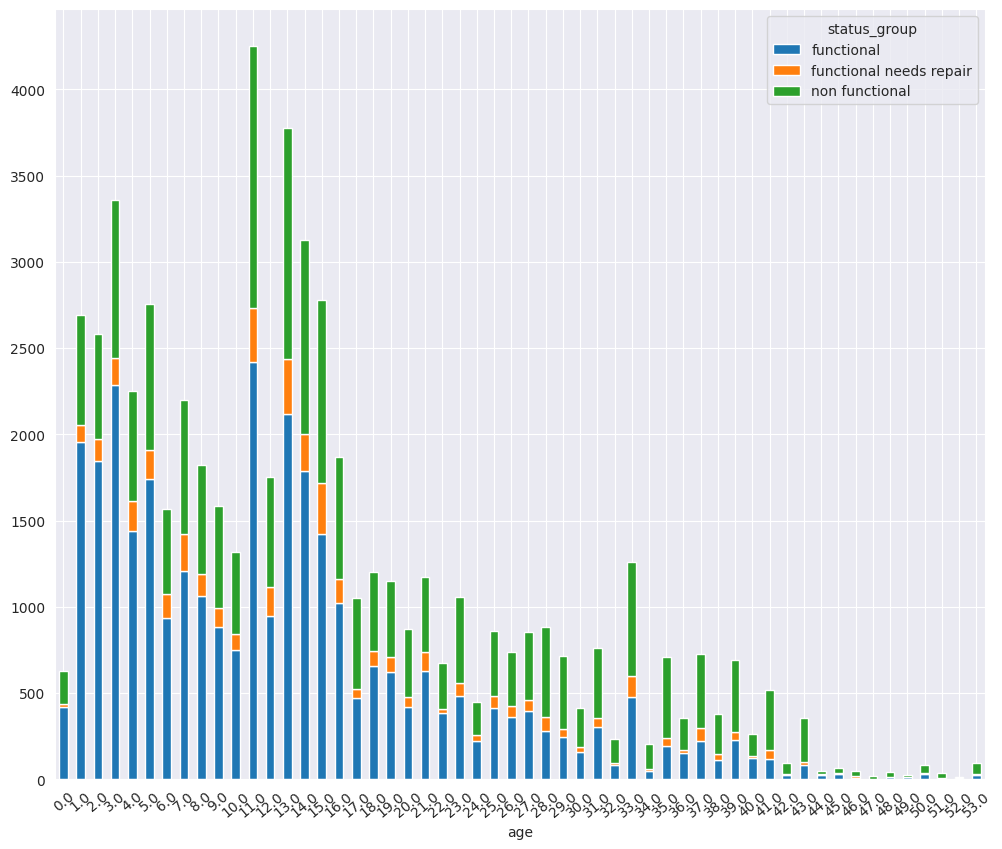

In [293]:
# Different ages
plot = plot_df.groupby(['age', 'status_group']) \
               .quantity \
               .count() \
               .unstack()

plot.plot(kind='bar', stacked=True, figsize=(12, 10), rot=40);

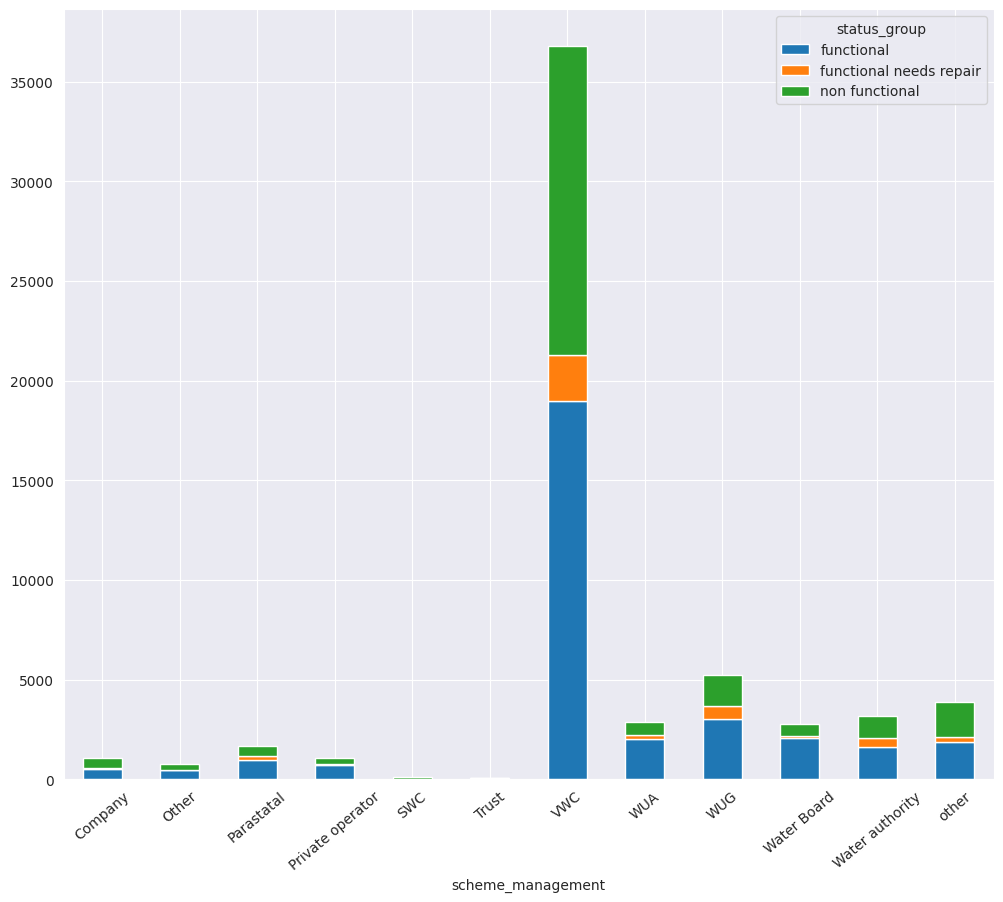

In [294]:
# Different scheme_management
plot = plot_df.groupby(['scheme_management', 'status_group']) \
               .quantity \
               .count() \
               .unstack()

plot.plot(kind='bar', stacked=True, figsize=(12, 10), rot=40);

In [295]:


# Split the plot_df into three based on status group
func_df = plot_df.loc[plot_df.status_group == 'functional']
nfunc_df = plot_df.loc[plot_df.status_group == 'non functional']
rfunc_df = plot_df.loc[plot_df.status_group == 'functional needs repair']

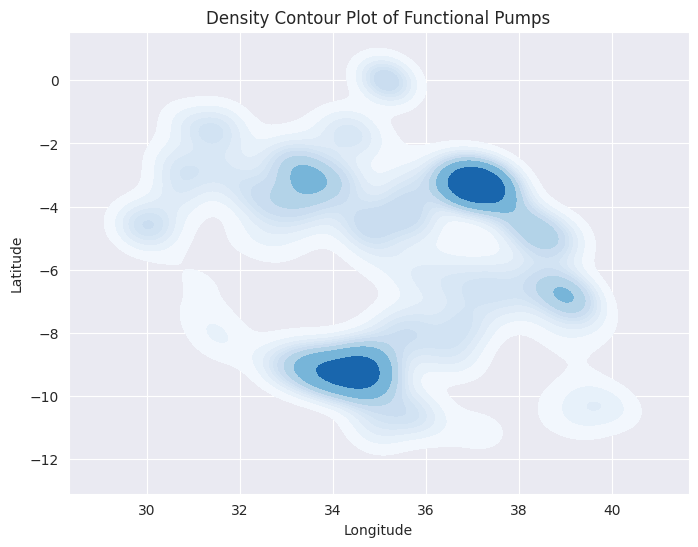

In [381]:
# Density contour plot of functional pumps
plt.figure(figsize=(8, 6))
sns.kdeplot(x=func_df['longitude'], y=func_df['latitude'], cmap='Blues', fill=True)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Density Contour Plot of Functional Pumps')
plt.show()


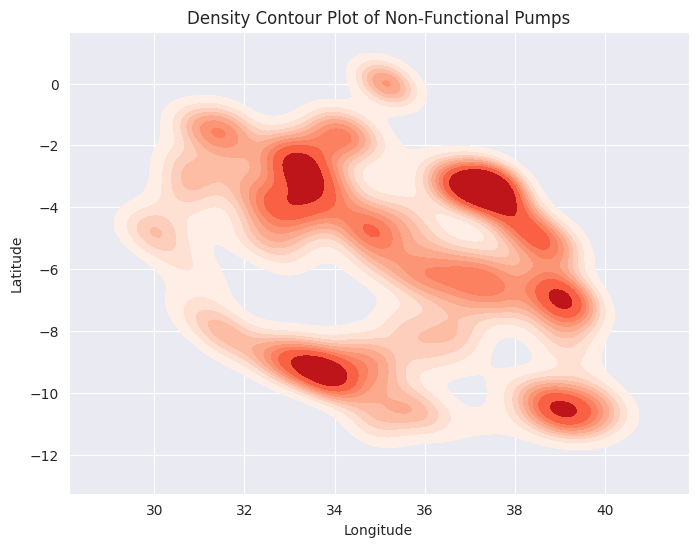

In [380]:
# Density contour plot of non-functional pumps
plt.figure(figsize=(8, 6))
sns.kdeplot(x=nfunc_df['longitude'], y=nfunc_df['latitude'], cmap='Reds', fill=True)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Density Contour Plot of Non-Functional Pumps')
plt.show()


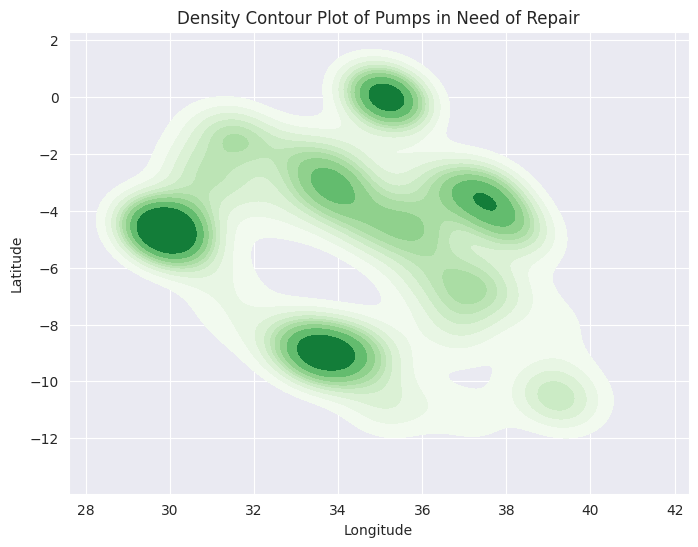

In [384]:
# Density contour plot of pumps in need of repair
plt.figure(figsize=(8, 6))
sns.kdeplot(x=rfunc_df['longitude'], y=rfunc_df['latitude'], cmap='Greens', fill=True)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Density Contour Plot of Pumps in Need of Repair')
plt.show()


In [299]:
# There are clear differences on the distribution of pumps with a different status.
# => The gps coordinates are likely to be an important feature in the models.

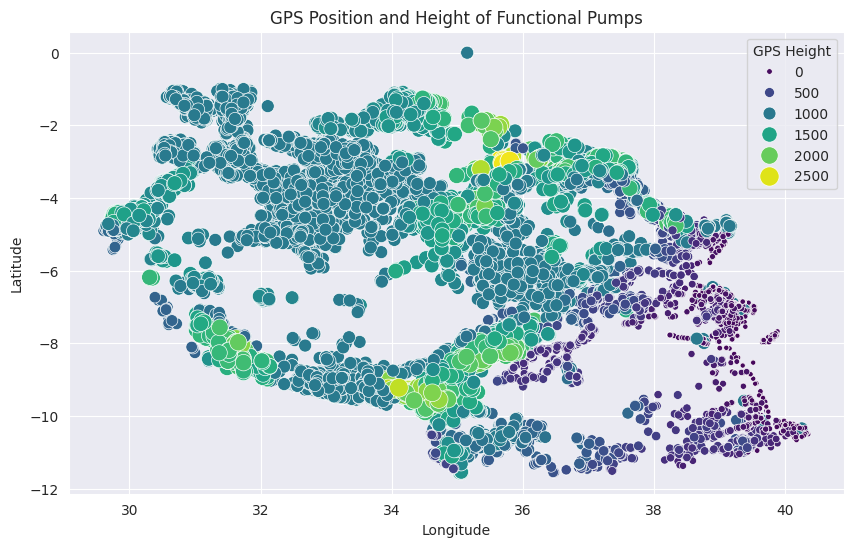

In [374]:
# Create scatterplot for functional pumps with size variation representing height
plt.figure(figsize=(10, 6))
scatterplot = sns.scatterplot(x=func_df['longitude'], y=func_df['latitude'], size=func_df['gps_height'], sizes=(10, 200), hue=func_df['gps_height'], palette='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('GPS Position and Height of Functional Pumps')

# Add legend
scatterplot.legend(title='GPS Height')

plt.show()


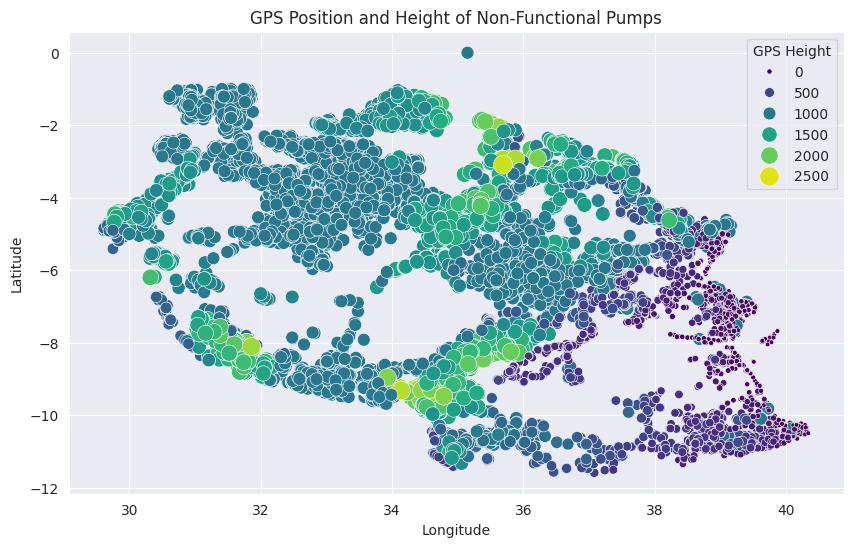

In [376]:
# Create scatterplot for non-functional pumps with size variation representing height
plt.figure(figsize=(10, 6))
scatterplot = sns.scatterplot(x=nfunc_df['longitude'], y=nfunc_df['latitude'], size=nfunc_df['gps_height'], sizes=(10, 200), hue=nfunc_df['gps_height'], palette='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('GPS Position and Height of Non-Functional Pumps')

# Add legend
scatterplot.legend(title='GPS Height')

plt.show()


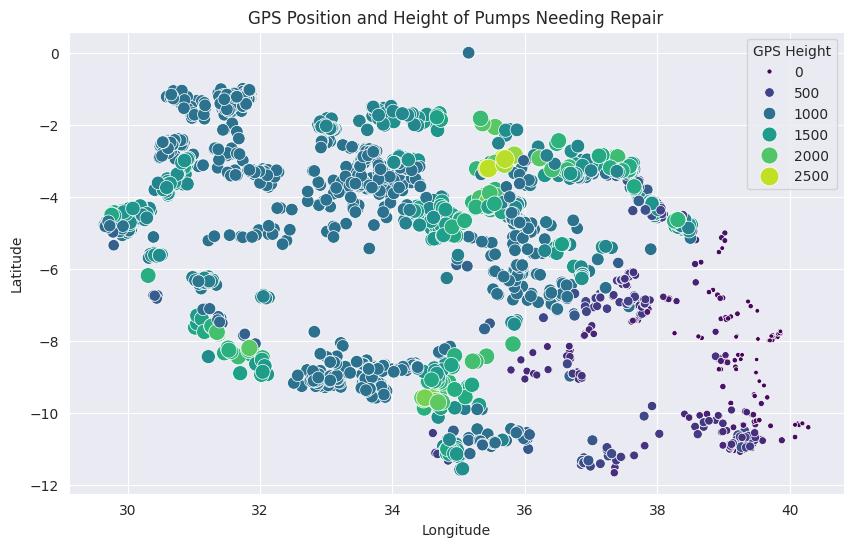

In [375]:
# Create scatterplot for pumps needing repair with size variation representing height
plt.figure(figsize=(10, 6))
scatterplot = sns.scatterplot(x=rfunc_df['longitude'], y=rfunc_df['latitude'], size=rfunc_df['gps_height'], sizes=(10, 200), hue=rfunc_df['gps_height'], palette='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('GPS Position and Height of Pumps Needing Repair')

# Add legend
scatterplot.legend(title='GPS Height')

plt.show()


## Preparation for modeling

### Factorization

In [304]:
# Droping the remaining useless columns
all_data = all_data.drop(['id', 'subvillage', 'lga', 'ward'], axis=1)

# List the categorical features
categorical = ['funder',
               'installer',
               'basin',
               'scheme_management',
               'extraction_type_class',
               'management',
               'management_group',
               'payment_type',
               'water_quality',
               'quantity',
               'source',
               'source_class',
               'waterpoint_type']

# factoring all the categorical features
for i in categorical:
    all_data[i] = pd.factorize(all_data[i])[0]

### Train-Test split and label factorization

In [305]:
# Splitting train and test
train = all_data[0:len(train_data)]
test = all_data[len(train_data):]

# Dropping the 'id' axis from the target
train_labels = train_labels.drop(['id'], axis=1)

# Factoring the target
labels = pd.factorize(train_labels.status_group)[0]

## PCA and LDA for visualizing the dataset

In [306]:
# Dimensionality reduction with PCA + LDA to try visualize the dataset in 2/3 dimensions

In [307]:
# Normalizing features
from sklearn.preprocessing import Normalizer

# Defining the normalized
normalizer = Normalizer()

# Fitting normalizer to train set
normalizer.fit(train)
train_norm = normalizer.transform(train)

In [308]:
# Importing PCA library
from sklearn import decomposition
from sklearn import preprocessing

# 10 components PCA
pca = decomposition.PCA(n_components=10)

# Fit PCA to train data
pca.fit(train_norm)
train_pca = pca.transform(train_norm)

In [309]:
# Importing LDA library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Trying to visualize the data in 2 dimensions

# 2 components LDA
LDA = LinearDiscriminantAnalysis(n_components=2, solver='svd')

# Fit LDA to train data
LDA.fit(train_norm, labels)
train_LDA = LDA.transform(train_norm)

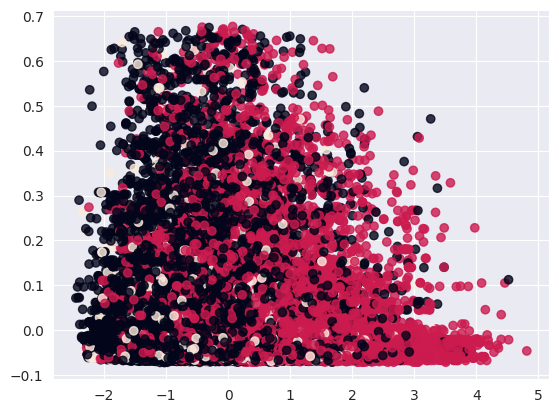

In [310]:
# Scatter plot colored by status group
plt.scatter(train_LDA[:,0], train_pca[:,1],
            alpha = .8, c=labels);

In [311]:
# 3 components PCA
pca = decomposition.PCA(n_components=3)

# Fit PCA to train data
pca.fit(train_norm)
train_pca = pca.transform(train_norm)

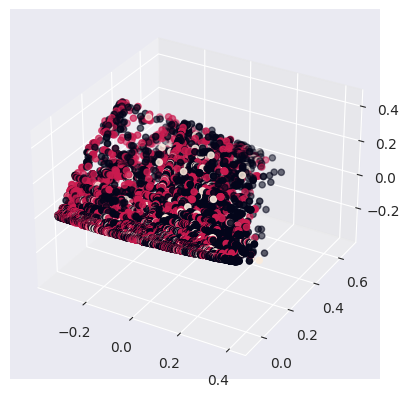

In [312]:
# 3D Scatter plot colored by status group
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(train_pca[:,0], train_pca[:,1], train_pca[:,2], c=labels)

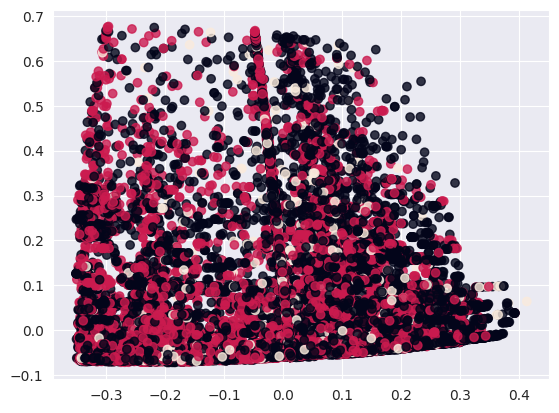

In [313]:
# 2D scatter plots colored by status group x-y axis
plt.scatter(train_pca[:,0], train_pca[:,1],
            alpha = .8, c=labels);

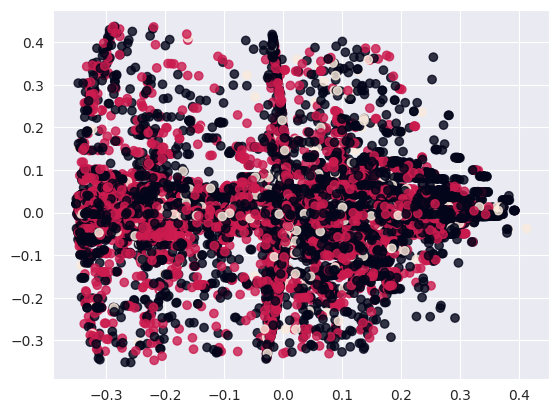

In [314]:
# 2D scatter plots colored by status group x-z axis
plt.scatter(train_pca[:,0], train_pca[:,2],
            alpha = .8, c=labels);

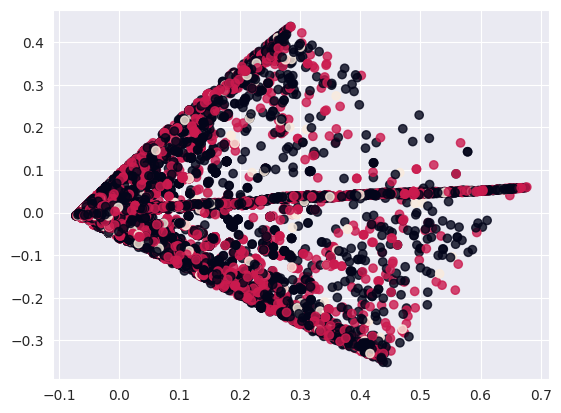

In [315]:
# 2D scatter plots colored by status group x-z axis
plt.scatter(train_pca[:,1], train_pca[:,2],
            alpha = .8, c=labels);

### LDA

In [325]:
# split data into train and test sets (using the same normalized dataset used for PCA and LDA)
seed = 42
test_size = 0.33
LDA_X_train, LDA_X_test, LDA_y_train, LDA_y_test = train_test_split(train_norm, labels,
                                                                    test_size=test_size,
                                                                    random_state=seed)

In [387]:
# 2 components LDA
LDA = LinearDiscriminantAnalysis(n_components=2, solver='svd')

# 10 components LDA
#LDA = LinearDiscriminantAnalysis(n_components=10, solver='svd')

# Fit LDA to train data
LDA.fit(LDA_X_train, LDA_y_train)
LDA_X_train = LDA.transform(LDA_X_train)

# make predictions for test data
LDA_y_pred = LDA.predict(LDA_X_test)

# evaluate predictions
accuracy = accuracy_score(LDA_y_test, LDA_y_pred)
precision = precision_score(LDA_y_test, LDA_y_pred, average='weighted')

# Print the results
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))

Accuracy: 64.25%
Precision: 61.90%


In [327]:
# 10 fold cross validation
score = cross_val_score(LDA, train, labels, scoring='accuracy', cv=10).mean()
print('10 fold cross-validation score:', score.round(4))

10 fold cross-validation score: 0.642


In [328]:
# Confusion matrix
pd.DataFrame(confusion_matrix(LDA_y_test, LDA_y_pred))

0     1    2
0  8751  1861  107
1  3605  3783   70
2   978   373   74

## Baseline Models

In [317]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score

### Train_Test Split for baseline models

In [318]:
from sklearn.model_selection import train_test_split

In [319]:
# split data into train and test sets
seed = 42
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=test_size, random_state=seed)

### KNN Baseline

In [320]:
from sklearn.neighbors import KNeighborsClassifier

In [321]:
# split data into train and test test
seed = 42
test_size = 0.33
knn_X_train, knn_X_test, knn_y_train, knn_y_test = train_test_split(train_norm, labels,
                                                                    test_size=test_size,
                                                                    random_state=seed)

In [322]:
# Define Classifier
knn = KNeighborsClassifier(n_neighbors=10)

# Fitting the model
knn.fit(knn_X_train, knn_y_train)

# make predictions for test data
knn_y_pred = knn.predict(knn_X_test)

# evaluate predictions
accuracy = accuracy_score(knn_y_test, knn_y_pred)
precision = precision_score(knn_y_test, knn_y_pred, average='weighted')

#results
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))

Accuracy: 68.39%
Precision: 67.45%


In [323]:
# 10 fold cross validation
score = cross_val_score(knn, train, labels, scoring='accuracy', cv=10).mean()
print('10 fold cross-validation score:', score.round(4))

10 fold cross-validation score: 0.6911


In [324]:
# Confusion matrix
pd.DataFrame(confusion_matrix(knn_y_test, knn_y_pred))

0     1    2
0  8954  1603  162
1  3161  4182  115
2   830   325  270

### Random Forest Baseline

In [329]:
from sklearn.ensemble import RandomForestClassifier

In [330]:
# Define classifier
forest = RandomForestClassifier(n_estimators=300, random_state=42)

# Fit the model
forest.fit(X_train,y_train)

# make predictions for test data
y_pred = forest.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))

Accuracy: 79.83%
Precision: 79.22%


In [331]:
# 3 fold cross validation
score = cross_val_score(forest, train, labels, scoring='accuracy', cv=3).mean()
print('3 fold cross-validation score:', score.round(4))

3 fold cross-validation score: 0.798


In [332]:
# Confusion matrix
pd.DataFrame(confusion_matrix(y_test, y_pred))

0     1    2
0  9340  1027  352
1  1522  5794  142
2   692   219  514

In [333]:
# Variable importance
test_predictions = pd.DataFrame(y_pred)

variable_importance = pd.concat([pd.DataFrame(X_train.columns),
                                        pd.DataFrame(forest.feature_importances_)],
                                       axis = 1)

variable_importance.columns = ['variable', 'importance']
variable_importance.sort_values(by='importance', ascending=False)[:10]

variable  importance
15               quantity    0.109160
4                latitude    0.108510
3               longitude    0.108449
1              gps_height    0.086827
21         population_log    0.071417
22                    age    0.055949
9       construction_year    0.055343
18        waterpoint_type    0.051605
10  extraction_type_class    0.051202
0                  funder    0.046578

### CatBoost

In [334]:
!pip install catboost
from catboost import CatBoostClassifier, Pool, cv

cat = CatBoostClassifier(
        iterations=750,
        learning_rate=0.1)

# Fitting the model
cat.fit(X_train, y_train)

# making predictions for test data
y_pred = cat.predict(X_test)

# evaluating predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

# Print the results
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))

0:	learn: 1.0338718	total: 25.7ms	remaining: 19.2s
1:	learn: 0.9796494	total: 52.7ms	remaining: 19.7s
2:	learn: 0.9368503	total: 80.3ms	remaining: 20s
3:	learn: 0.9029413	total: 104ms	remaining: 19.5s
4:	learn: 0.8740023	total: 129ms	remaining: 19.2s
5:	learn: 0.8489435	total: 154ms	remaining: 19.1s
6:	learn: 0.8282841	total: 183ms	remaining: 19.4s
7:	learn: 0.8104179	total: 213ms	remaining: 19.8s
8:	learn: 0.7946825	total: 244ms	remaining: 20.1s
9:	learn: 0.7809012	total: 274ms	remaining: 20.3s
10:	learn: 0.7697541	total: 308ms	remaining: 20.7s
11:	learn: 0.7597991	total: 333ms	remaining: 20.5s
12:	learn: 0.7499029	total: 368ms	remaining: 20.9s
13:	learn: 0.7413396	total: 394ms	remaining: 20.7s
14:	learn: 0.7337068	total: 419ms	remaining: 20.5s
15:	learn: 0.7268574	total: 450ms	remaining: 20.6s
16:	learn: 0.7203848	total: 482ms	remaining: 20.8s
17:	learn: 0.7143481	total: 511ms	remaining: 20.8s
18:	learn: 0.7091901	total: 553ms	remaining: 21.3s
19:	learn: 0.7043355	total: 584ms	remain

In [335]:
# 3 fold cross validation
score = cross_val_score(cat, train, labels, scoring='accuracy', cv=3).mean()
print('3 fold cross-validation score:', score.round(4))

0:	learn: 1.0327218	total: 32.7ms	remaining: 24.5s
1:	learn: 0.9784584	total: 59.8ms	remaining: 22.4s
2:	learn: 0.9355068	total: 85.3ms	remaining: 21.2s
3:	learn: 0.9019405	total: 114ms	remaining: 21.3s
4:	learn: 0.8736064	total: 140ms	remaining: 20.9s
5:	learn: 0.8483956	total: 166ms	remaining: 20.6s
6:	learn: 0.8282941	total: 195ms	remaining: 20.7s
7:	learn: 0.8104212	total: 222ms	remaining: 20.6s
8:	learn: 0.7944858	total: 255ms	remaining: 21s
9:	learn: 0.7811722	total: 281ms	remaining: 20.8s
10:	learn: 0.7698230	total: 310ms	remaining: 20.8s
11:	learn: 0.7597731	total: 340ms	remaining: 20.9s
12:	learn: 0.7496822	total: 370ms	remaining: 21s
13:	learn: 0.7415834	total: 398ms	remaining: 20.9s
14:	learn: 0.7346423	total: 434ms	remaining: 21.3s
15:	learn: 0.7274791	total: 466ms	remaining: 21.4s
16:	learn: 0.7212793	total: 496ms	remaining: 21.4s
17:	learn: 0.7156200	total: 523ms	remaining: 21.3s
18:	learn: 0.7106157	total: 553ms	remaining: 21.3s
19:	learn: 0.7058896	total: 579ms	remainin

## Hyperparameter Tuning

###KNN after LDA

In [336]:
# Fit LDA to train data
LDA.fit(train_norm, labels)
train_LDA = LDA.transform(train_norm)

In [337]:
# split data into train and test sets
seed = 42
test_size = 0.33
LDA_X_train, LDA_X_test, LDA_y_train, LDA_y_test = train_test_split(train_LDA, labels,
                                                                    test_size=test_size,
                                                                    random_state=seed)

In [338]:
# Define classifier
#LDA_knn = KNeighborsClassifier(n_neighbors=10)

LDA_knn = KNeighborsClassifier()


In [339]:
knn_param_grid = {
    'n_neighbors': [5, 10, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40],
    'metric': ['euclidean', 'manhattan'],
    'n_jobs': [-1]
}


In [340]:

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Defining the random search
knn_cv = RandomizedSearchCV(LDA_knn, param_distributions=knn_param_grid, n_iter=10, cv=3)

# Fitting the search
knn_cv.fit(LDA_X_train, LDA_y_train)

knn_best_param = knn_cv.best_params_

# Returning best set of parameter and best cross validated score (accuracy)
print("Best parameters:", knn_cv.best_params_)
#print("Best score:", knn_cv.best_score_.round(6))

Best parameters: {'weights': 'distance', 'n_neighbors': 10, 'n_jobs': -1, 'metric': 'manhattan', 'leaf_size': 30, 'algorithm': 'kd_tree'}


In [341]:
# Training a new KNN Classifier with the best hyperparameters
best_knn_classifier = KNeighborsClassifier(**knn_best_param)
best_knn_classifier.fit(LDA_X_train, LDA_y_train)

# Make predictions on the test set
y_pred = best_knn_classifier.predict(LDA_X_test)

# evaluate predictions
accuracy = accuracy_score(LDA_y_test, LDA_y_pred)
precision = precision_score(LDA_y_test, LDA_y_pred, average='weighted')

# Print the results
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))

print("\nClassification Report:\n", classification_report(LDA_y_test, LDA_y_pred))
print("\nConfusion Matrix:\n", pd.DataFrame(confusion_matrix(LDA_y_test, LDA_y_pred)))

Accuracy: 64.32%
Precision: 61.95%

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.82      0.73     10719
           1       0.63      0.51      0.56      7458
           2       0.29      0.05      0.09      1425

    accuracy                           0.64     19602
   macro avg       0.53      0.46      0.46     19602
weighted avg       0.62      0.64      0.62     19602


Confusion Matrix:
       0     1    2
0  8751  1861  107
1  3605  3783   70
2   978   373   74


In [342]:
# 10 fold cross validation
score = cross_val_score(best_knn_classifier, train, labels, scoring='accuracy', cv=10).mean()
print('10 fold cross-validation score:', score.round(4))

10 fold cross-validation score: 0.7347


### Random Forest

In [343]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [344]:
# Defining the classifier
forest = RandomForestClassifier()

In [345]:

param_dist = {'n_estimators':[100, 300, 500],
                         'max_depth':[None, 10, 20, 30],
                         'max_features':['sqrt', 'log2'],
                         'min_samples_split':[2, 5, 10],
                         'min_samples_leaf':[3, 5, 7]}

In [346]:
# Defining the random search
cv = RandomizedSearchCV(forest, param_distributions=param_dist, n_iter=10, cv=3)

# Fitting the search
cv.fit(X_train, y_train)

best_param = cv.best_params_

# Returning best set of parameter and best cross validated score (accuracy)
print("Best parameters:", cv.best_params_)
#print("Best score:", cv.best_score_.round(6))

Best parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 30}


In [347]:
# Training a new Random Forest Classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(**best_param, random_state=42)
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_classifier.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

# Print the results
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", pd.DataFrame(confusion_matrix(y_test, y_pred)))

Accuracy: 80.78%
Precision: 80.37%

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.91      0.85     10719
           1       0.85      0.76      0.80      7458
           2       0.65      0.27      0.38      1425

    accuracy                           0.81     19602
   macro avg       0.76      0.65      0.68     19602
weighted avg       0.80      0.81      0.80     19602


Confusion Matrix:
       0     1    2
0  9756   820  143
1  1703  5690   65
2   823   214  388


In [348]:
# 3 fold cross validation
score = cross_val_score(best_rf_classifier, train, labels, scoring='accuracy', cv=3).mean()
print('3 fold cross-validation score:', (100* score.round(6)))

3 fold cross-validation score: 80.6061


### CatBoost

In [350]:
# defining the dlassifier
cat = CatBoostClassifier()

In [351]:

cat_param_dist = {
    'iterations': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'random_strength': [0, 10, 50],
    'bagging_temperature': [0.1, 0.5, 1.0],
    'border_count': [1, 10, 20],
    'loss_function': ['MultiClass'],
    'random_state': [42]
}



In [352]:
# Defining the random search ---
cat_cv = RandomizedSearchCV(cat, param_distributions=cat_param_dist, n_iter=10, cv=3)

# Fitting the search
cat_cv.fit(X_train, y_train)

cat_best_param = cat_cv.best_params_

# Returning best set of parameter and best cross validated score (accuracy)
print("Best parameters:", cat_cv.best_params_)
#print("Best score:", cat_cv.best_score_.round(6))

Streaming output truncated to the last 5000 lines.
1:	learn: 1.0837750	total: 93.5ms	remaining: 23.3s
2:	learn: 1.0766127	total: 134ms	remaining: 22.2s
3:	learn: 1.0696245	total: 174ms	remaining: 21.6s
4:	learn: 1.0628136	total: 216ms	remaining: 21.3s
5:	learn: 1.0561519	total: 263ms	remaining: 21.6s
6:	learn: 1.0496473	total: 305ms	remaining: 21.5s
7:	learn: 1.0432998	total: 346ms	remaining: 21.3s
8:	learn: 1.0370759	total: 403ms	remaining: 22s
9:	learn: 1.0309992	total: 444ms	remaining: 21.8s
10:	learn: 1.0250502	total: 498ms	remaining: 22.1s
11:	learn: 1.0192389	total: 538ms	remaining: 21.9s
12:	learn: 1.0135612	total: 579ms	remaining: 21.7s
13:	learn: 1.0079979	total: 620ms	remaining: 21.5s
14:	learn: 1.0025781	total: 663ms	remaining: 21.4s
15:	learn: 0.9972457	total: 709ms	remaining: 21.4s
16:	learn: 0.9920422	total: 750ms	remaining: 21.3s
17:	learn: 0.9869186	total: 791ms	remaining: 21.2s
18:	learn: 0.9819292	total: 836ms	remaining: 21.2s
19:	learn: 0.9770108	total: 876ms	remaini

In [353]:
# Train a new CatBoost Classifier with the best hyperparameters
best_cat_classifier = CatBoostClassifier(**cat_best_param)
best_cat_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_cat_classifier.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

# Print the results
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", pd.DataFrame(confusion_matrix(y_test, y_pred)))

0:	learn: 1.0262651	total: 61.5ms	remaining: 6.09s
1:	learn: 0.9699782	total: 149ms	remaining: 7.29s
2:	learn: 0.9246203	total: 220ms	remaining: 7.1s
3:	learn: 0.8870554	total: 283ms	remaining: 6.8s
4:	learn: 0.8556835	total: 347ms	remaining: 6.6s
5:	learn: 0.8287252	total: 413ms	remaining: 6.46s
6:	learn: 0.8059561	total: 474ms	remaining: 6.3s
7:	learn: 0.7873477	total: 539ms	remaining: 6.2s
8:	learn: 0.7706263	total: 602ms	remaining: 6.08s
9:	learn: 0.7534630	total: 666ms	remaining: 5.99s
10:	learn: 0.7410548	total: 731ms	remaining: 5.91s
11:	learn: 0.7274573	total: 797ms	remaining: 5.84s
12:	learn: 0.7178110	total: 860ms	remaining: 5.76s
13:	learn: 0.7088516	total: 925ms	remaining: 5.68s
14:	learn: 0.7002362	total: 988ms	remaining: 5.6s
15:	learn: 0.6915653	total: 1.05s	remaining: 5.52s
16:	learn: 0.6844081	total: 1.12s	remaining: 5.47s
17:	learn: 0.6776437	total: 1.2s	remaining: 5.49s
18:	learn: 0.6722020	total: 1.27s	remaining: 5.42s
19:	learn: 0.6673199	total: 1.33s	remaining: 5.

In [354]:
# 3 fold cross validation
score = cross_val_score(best_cat_classifier, train, labels, scoring='accuracy', cv=3).mean()
print('3 fold cross-validation score:', (100* score.round(6)))

0:	learn: 1.0257806	total: 62.3ms	remaining: 6.17s
1:	learn: 0.9690328	total: 124ms	remaining: 6.08s
2:	learn: 0.9232728	total: 188ms	remaining: 6.08s
3:	learn: 0.8860490	total: 249ms	remaining: 5.98s
4:	learn: 0.8550745	total: 313ms	remaining: 5.95s
5:	learn: 0.8291416	total: 374ms	remaining: 5.86s
6:	learn: 0.8058781	total: 437ms	remaining: 5.81s
7:	learn: 0.7864721	total: 501ms	remaining: 5.76s
8:	learn: 0.7699442	total: 566ms	remaining: 5.72s
9:	learn: 0.7553681	total: 633ms	remaining: 5.7s
10:	learn: 0.7416317	total: 712ms	remaining: 5.76s
11:	learn: 0.7302574	total: 778ms	remaining: 5.71s
12:	learn: 0.7196542	total: 846ms	remaining: 5.66s
13:	learn: 0.7110712	total: 909ms	remaining: 5.58s
14:	learn: 0.7014286	total: 970ms	remaining: 5.5s
15:	learn: 0.6937006	total: 1.04s	remaining: 5.44s
16:	learn: 0.6868340	total: 1.1s	remaining: 5.38s
17:	learn: 0.6797781	total: 1.17s	remaining: 5.32s
18:	learn: 0.6741560	total: 1.23s	remaining: 5.24s
19:	learn: 0.6671812	total: 1.29s	remaining